<a href="https://colab.research.google.com/github/Samra771/samrasana/blob/main/MHR_Feature_Selection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries and overview of the dataset**

In [ ]:
# Example basic libraries to import
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
import plotly.express as px
from scipy.io import arff
import warnings
warnings.simplefilter("ignore")

# Example machine learning libraries to import
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification
from sklearn.ensemble import RandomForestClassifier  # For random forest classification
from sklearn.metrics import accuracy_score, mean_squared_error  # For model evaluation


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, fbeta_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn import tree
import xgboost as xgb

**Loading the Dataset**

In [ ]:
df = pd.read_csv("MaternalHealthRisk_project1.csv")
df.head()

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0   25      71.6         130           80  15.0         86   
1   35      86.4         140           90  13.0         70   
2   29      57.3          90           70   8.0         80   
3   30      81.0         140           85   7.0         70   
4   35      47.7         120           60   6.1         76   

   Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                  91        98.0        36.7  high risk  
1                  96        98.0        36.7  high risk  
2                  98       100.0        37.8  high risk  
3                  94        98.0        36.7  high risk  
4                  98        98.0        36.7   low risk

In [ ]:
#Information about the columns of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1014 non-null   int64  
 1   WeightKG            1014 non-null   float64
 2   SystolicBP          1014 non-null   int64  
 3   DiastolicBP         1014 non-null   int64  
 4   BS                  1014 non-null   float64
 5   HeartRate           1014 non-null   int64  
 6   Blood_oxygen_level  1014 non-null   int64  
 7   BodyTemp_F          1014 non-null   float64
 8   BodyTemp_C          1014 non-null   float64
 9   RiskLevel           1014 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 79.3+ KB


In [ ]:
#Check for null/NAN values
df.isnull().sum()

Age                   0
WeightKG              0
SystolicBP            0
DiastolicBP           0
BS                    0
HeartRate             0
Blood_oxygen_level    0
BodyTemp_F            0
BodyTemp_C            0
RiskLevel             0
dtype: int64

In [ ]:
#check for duplicate data
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 1 duplicates data


Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
655   48      57.5         120           80  11.0         88   
979   48      57.5         120           80  11.0         88   

     Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
655                  92        98.0        36.7  high risk  
979                  92        98.0        36.7  high risk

In [ ]:
#Count of values for each risk level
risk_levels = df["RiskLevel"].value_counts()
risk_levels_df = pd.DataFrame(risk_levels)
risk_levels_df = risk_levels.reset_index(level = 0)
risk_levels_df

RiskLevel  count
0   low risk    406
1   mid risk    336
2  high risk    272

In [ ]:
df.size

10140

**Distribution of Risk Level**

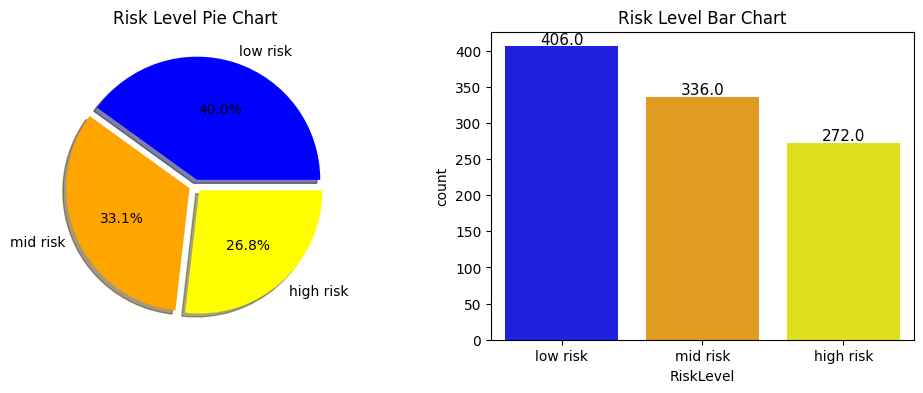

In [ ]:
# Plotting risk level counts and percentages
p_colors = ['blue', 'orange', 'yellow']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 5),
        textcoords='offset points')
    ax[1].set_title("Risk Level Bar Chart")
plt.show()

In [ ]:
df.describe().T

count        mean        std   min      25%     50%  \
Age                 1014.0   29.871795  13.474386  10.0   19.000   26.00   
WeightKG            1014.0   67.672091  12.976207  45.5   56.025   67.35   
SystolicBP          1014.0  113.198225  18.403913  70.0  100.000  120.00   
DiastolicBP         1014.0   76.460552  13.885796  49.0   65.000   80.00   
BS                  1014.0    8.725986   3.293532   6.0    6.900    7.50   
HeartRate           1014.0   74.301775   8.088702   7.0   70.000   76.00   
Blood_oxygen_level  1014.0   94.637081   2.948797  90.0   92.000   95.00   
BodyTemp_F          1014.0   98.665089   1.371384  98.0   98.000   98.00   
BodyTemp_C          1014.0   37.059763   0.743991  36.7   36.700   36.70   

                        75%    max  
Age                  39.000   70.0  
WeightKG             79.375   90.3  
SystolicBP          120.000  160.0  
DiastolicBP          90.000  100.0  
BS                    8.000   19.0  
HeartRate            80.000   90.0  
Blood_oxygen_level   97.000   99.0  
BodyTemp_F           98.000  103.0  
BodyTemp_C           36.700   39.4

In [ ]:
def num_plot(data, col):
  """
  Generate a histogram with KDE and a boxplot for a numerical column in a given dataset.

  Parameters:
    data (DataFrame): The input DataFrame containing the data.
    col (str): The column name for which the plots are generated.
  """
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))
  sns.histplot(data=data, x=col, kde=True, ax=ax[0], color="#FFA500")
  sns.boxplot(data=data, x=col, ax=ax[1])
  ax[0].set_title(f"{col} Distribution Histogram")
  ax[1].set_title(f"{col} Distribution Boxplot")

  plt.show()

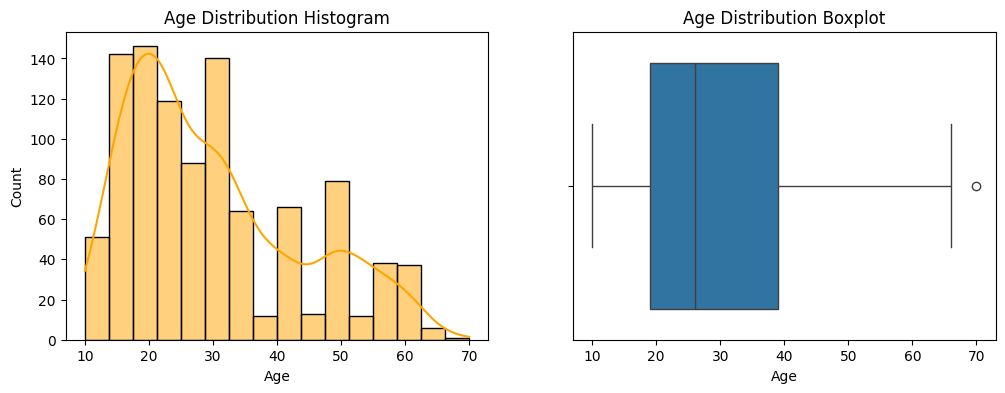

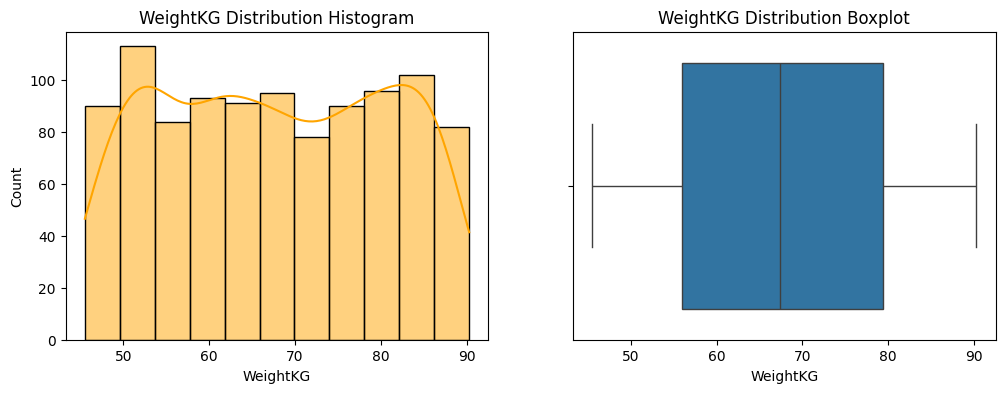

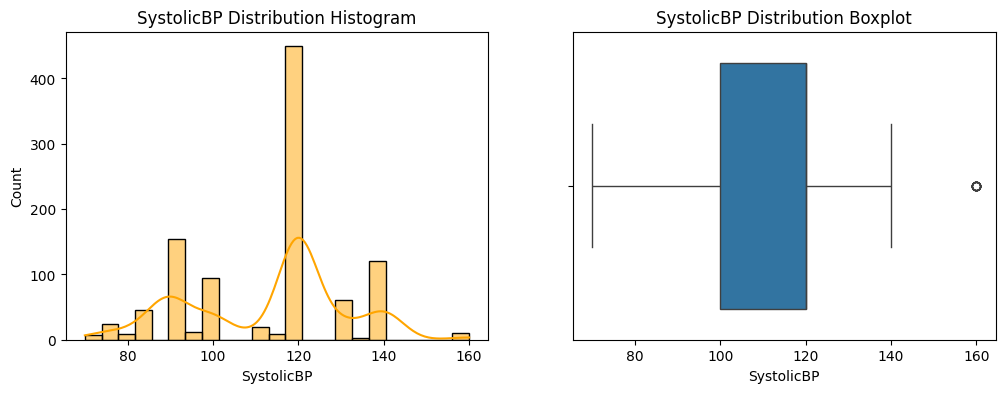

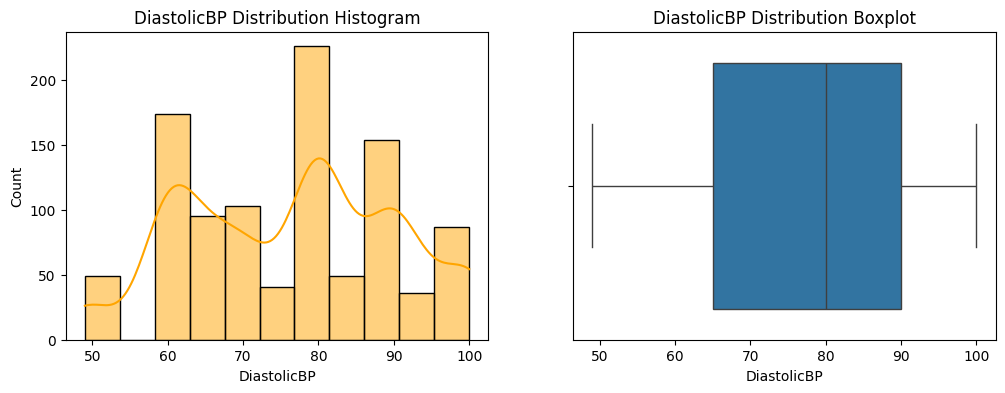

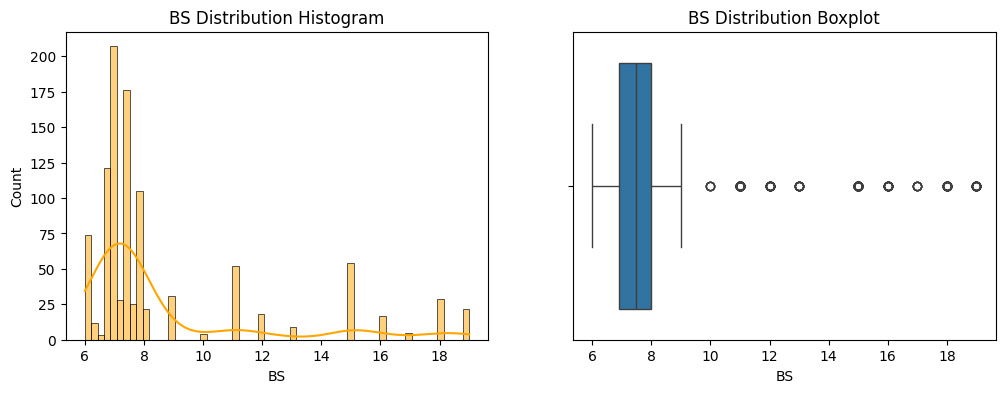

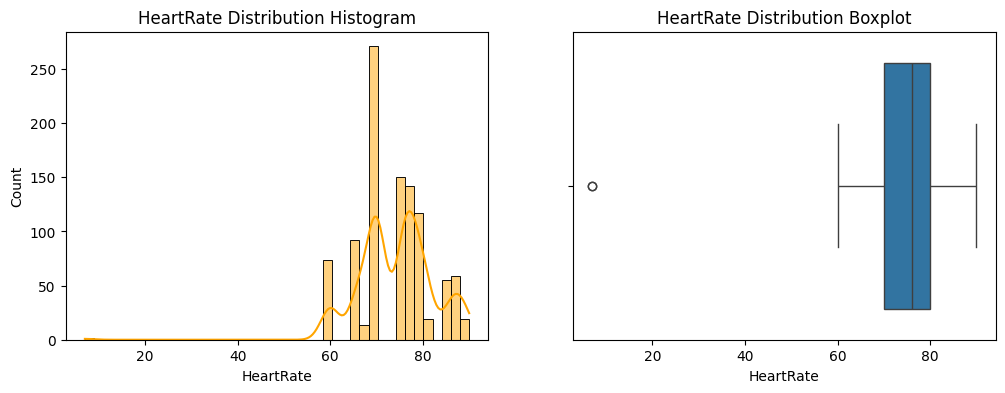

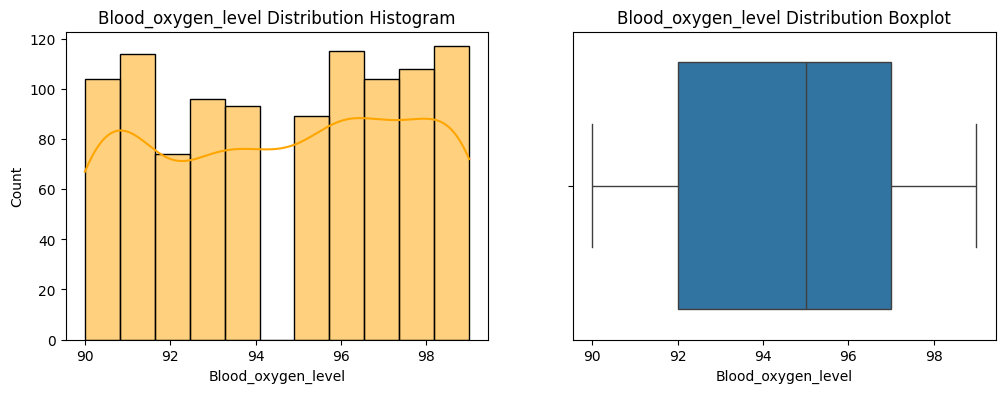

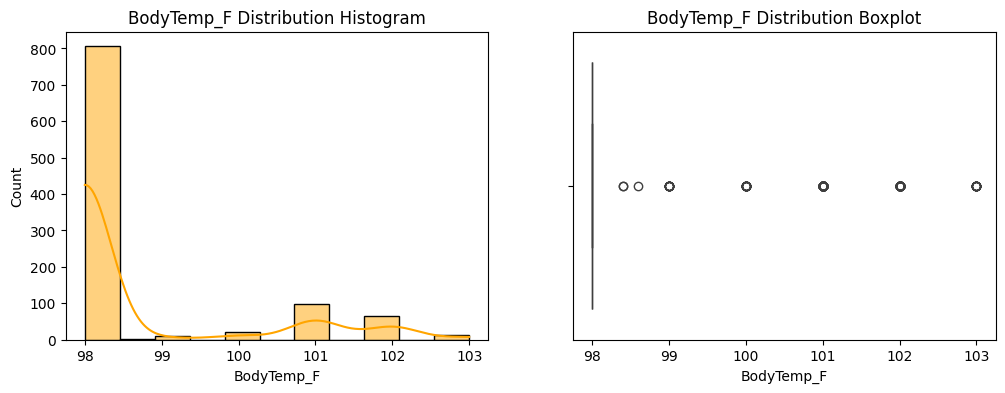

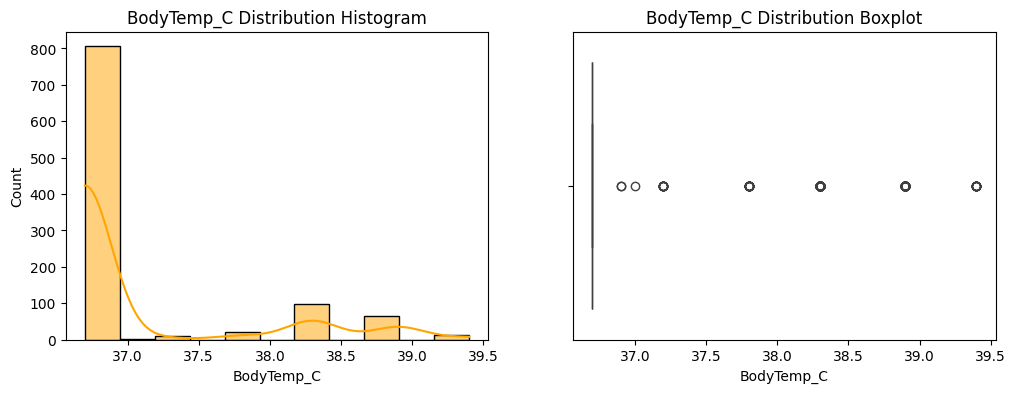

In [ ]:
# Iterate through each column for univariate analysis
columns = df.columns[:len(df.columns) - 1]
for i in range(len(columns)):
  num_plot(df, columns[i])

On Observation, almost all variables have outlier that cause skewed distribution.

**Bivariate Analysis**

Bivariate analysis is a method used to explore the relationship between two variables, aiming to identify any correlation and its strength. This analysis involves studying one dependent variable and one independent variable

**Bivariate analysis with the Risk level**

<Figure size 800x500 with 0 Axes>

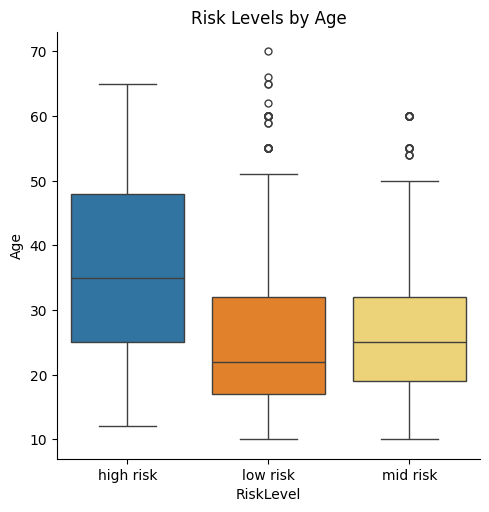

<Figure size 800x500 with 0 Axes>

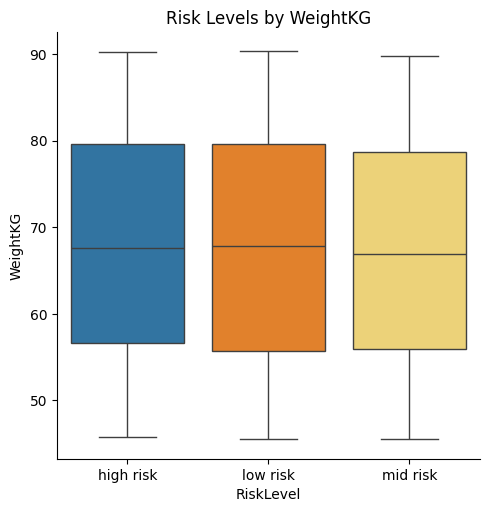

<Figure size 800x500 with 0 Axes>

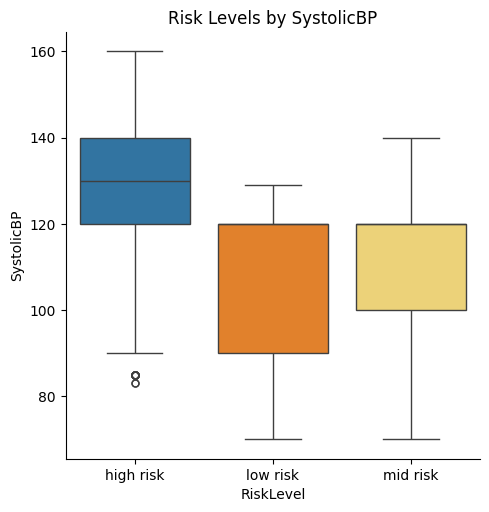

<Figure size 800x500 with 0 Axes>

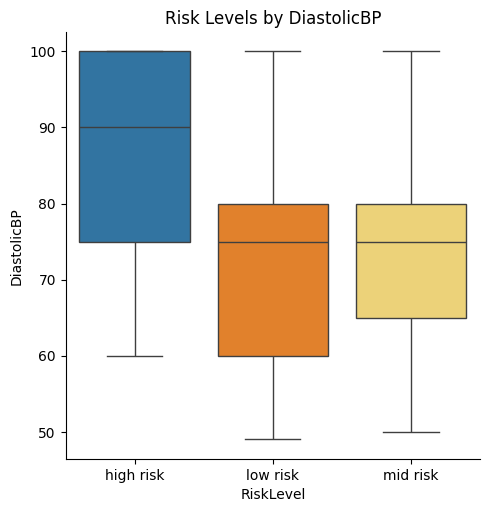

<Figure size 800x500 with 0 Axes>

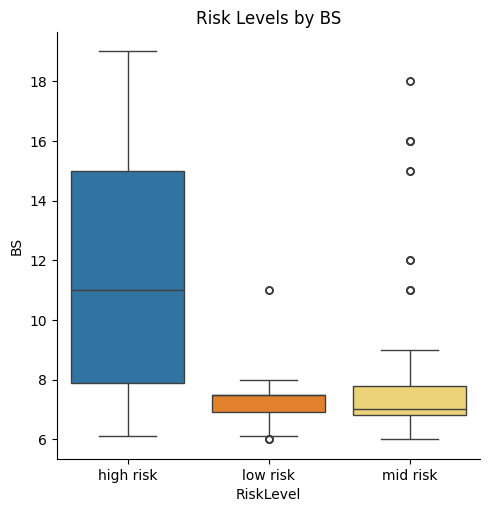

<Figure size 800x500 with 0 Axes>

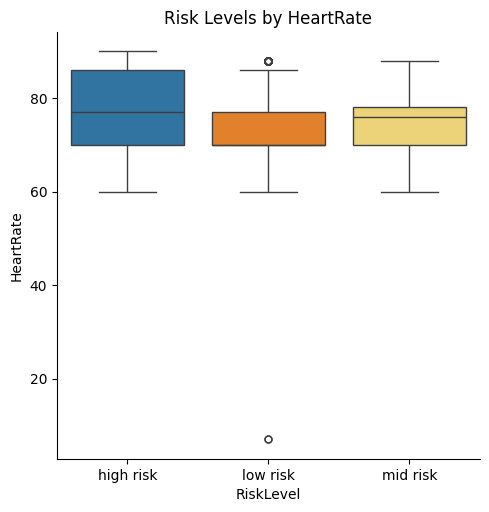

<Figure size 800x500 with 0 Axes>

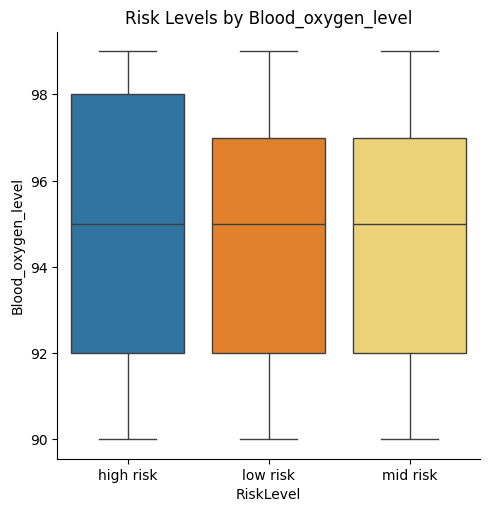

<Figure size 800x500 with 0 Axes>

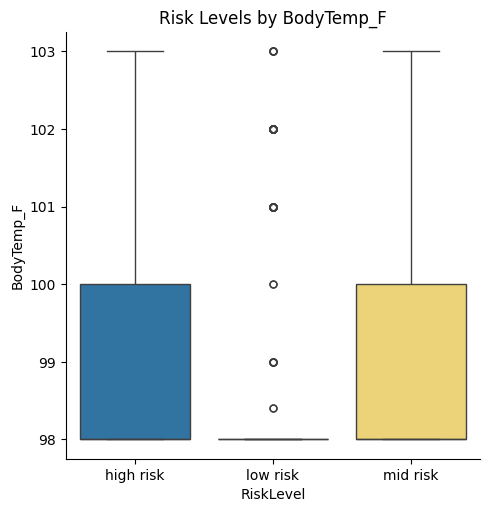

<Figure size 800x500 with 0 Axes>

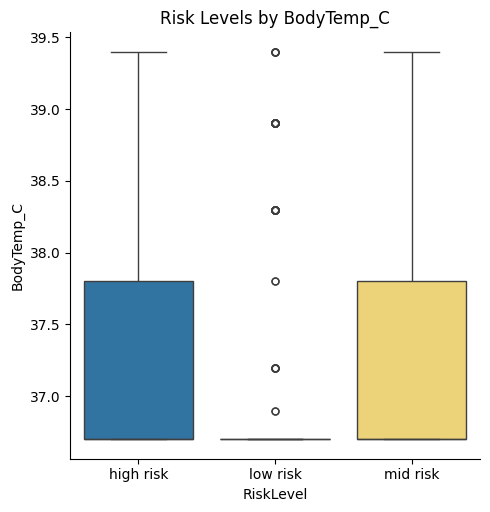

In [ ]:
# Iterate through each column for bivariate analysis (comparing RiskLevel with other numerical columns)
columns = df.columns[:len(df.columns) - 1]
for i in range(len(columns)):
    plt.figure(figsize = (8, 5))
    sns.catplot(data = df,
                x = "RiskLevel",
                y = columns[i],
                kind = "box",
                palette = ["#1f77b4", "#ff7f0e", "#ffdd66"]).set(title = f"Risk Levels by {columns[i]}");

**Visualize the relationships between different pairs of variables in the dataset**

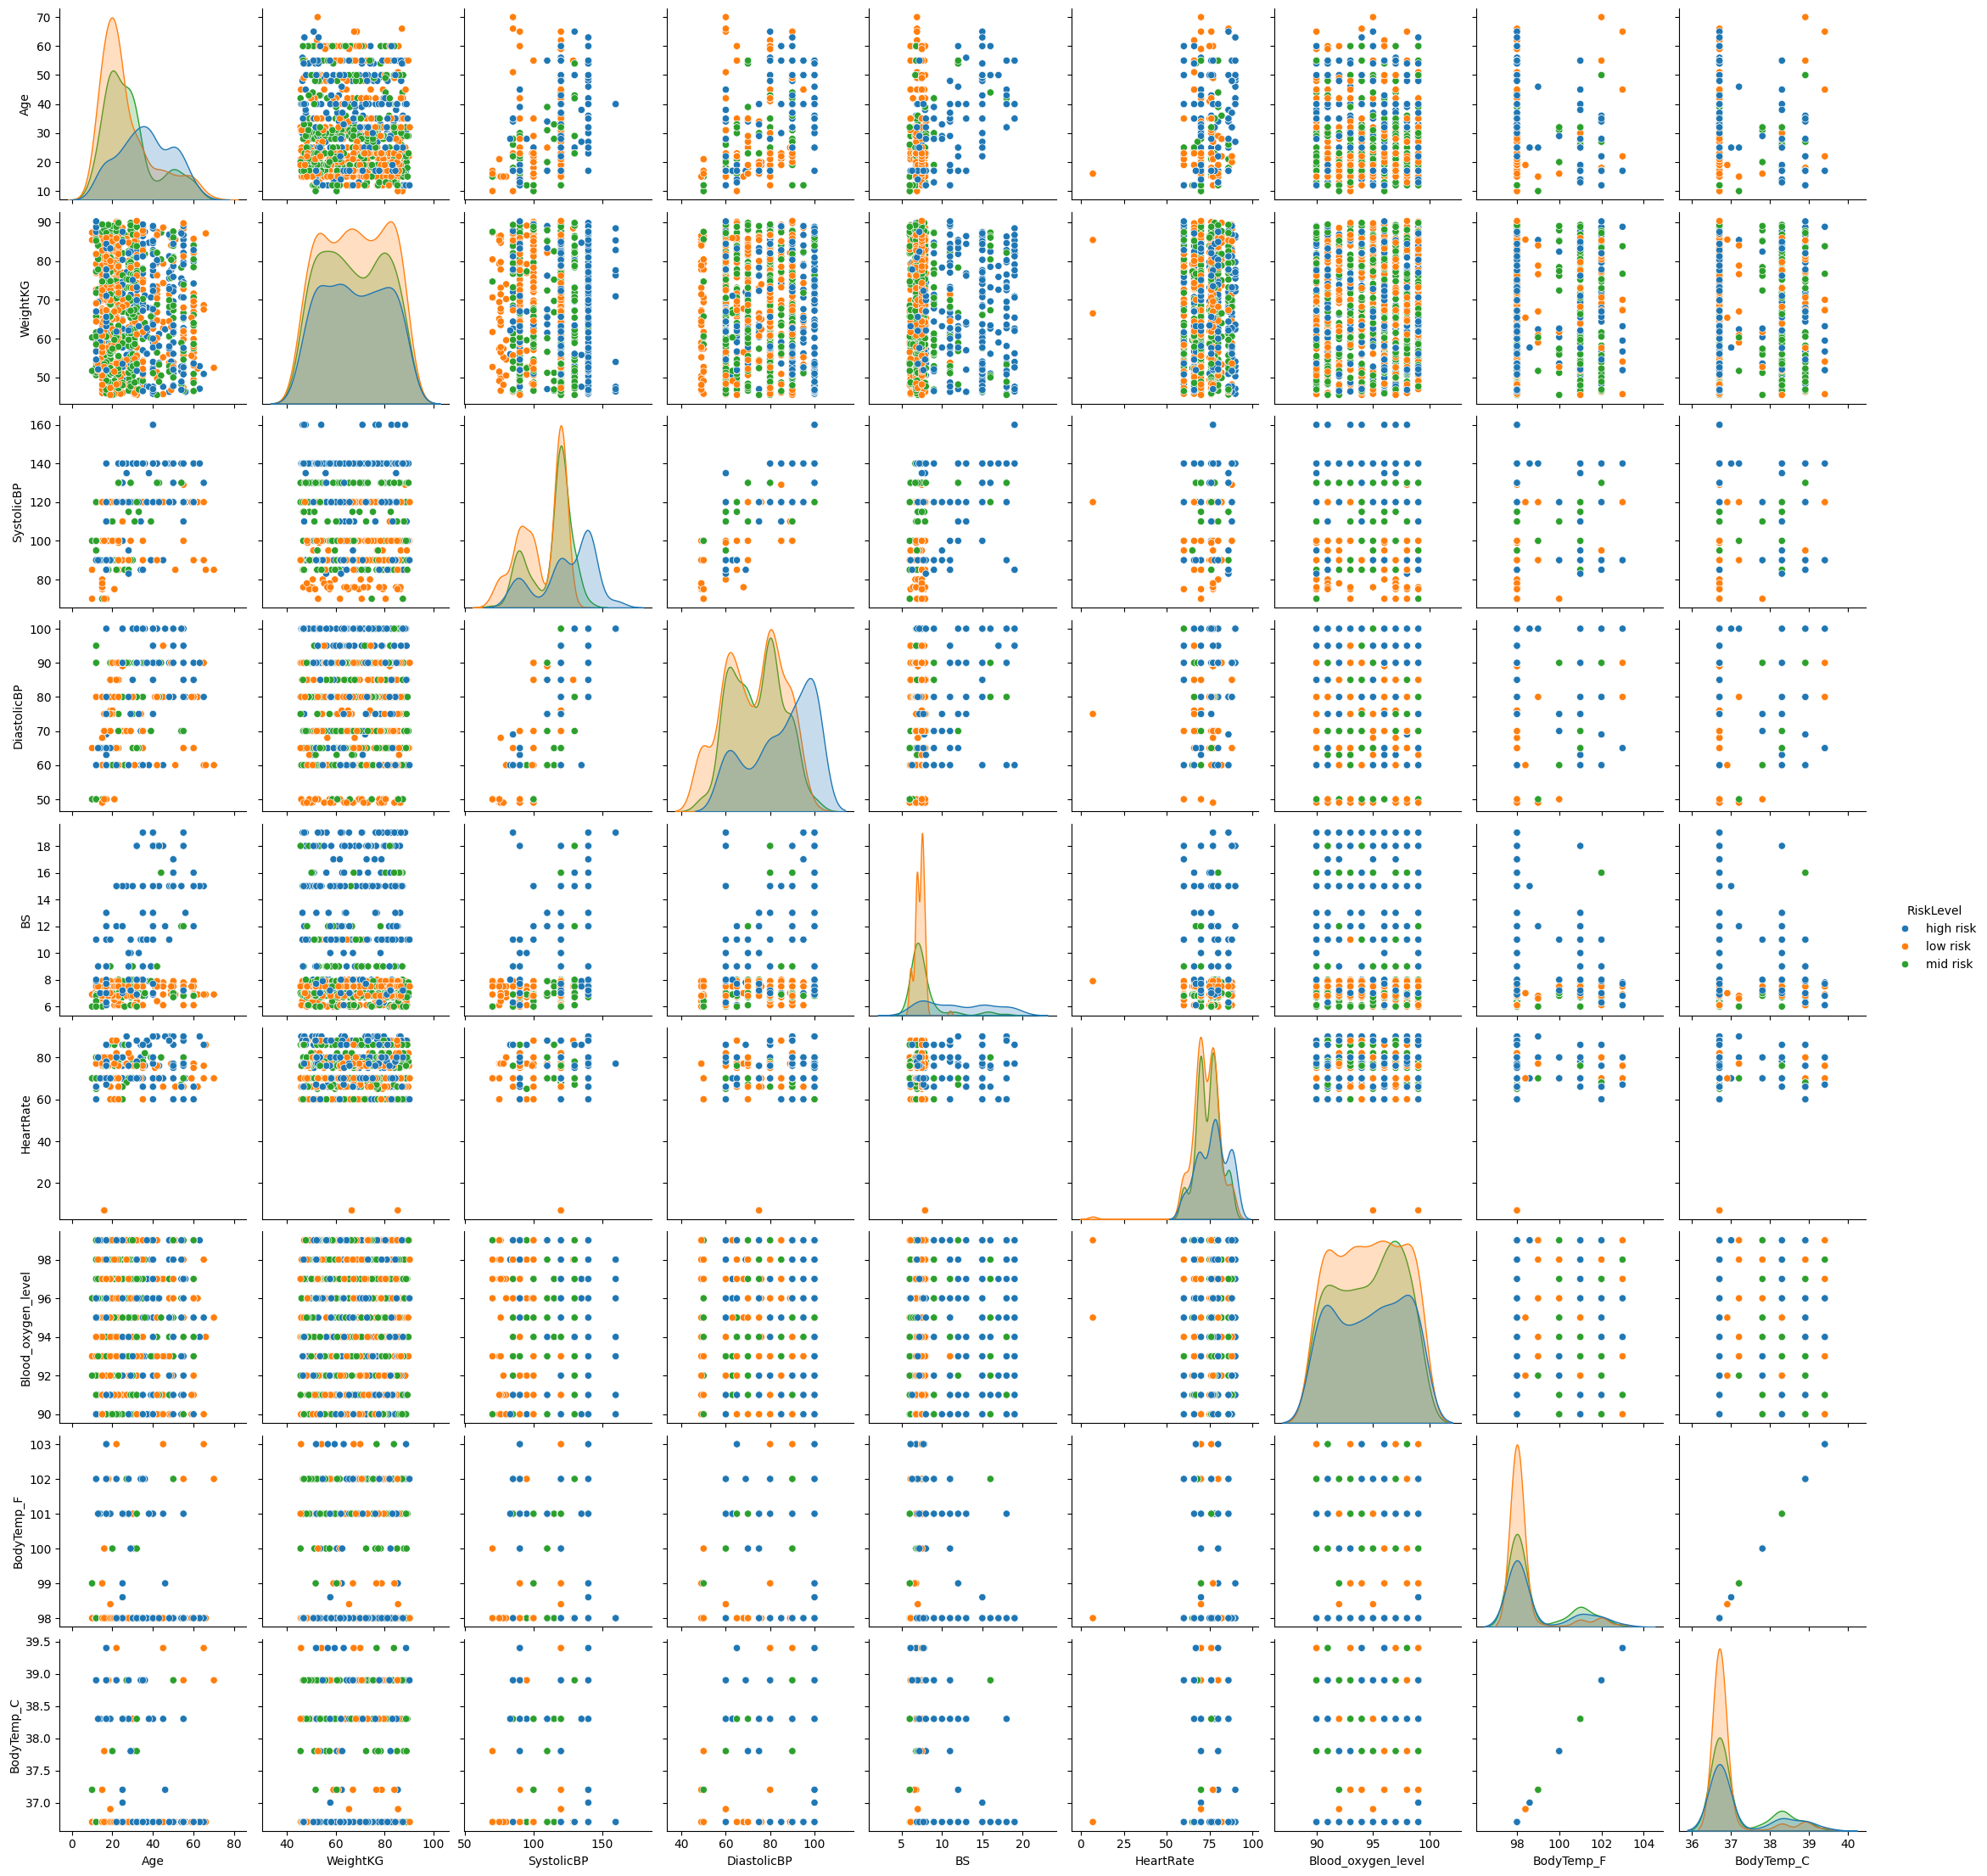

In [ ]:
# General distribution
sns.pairplot(df.iloc[:,:], hue = "RiskLevel");

The above pair plot display scatterplots for all pairs of numeric variables, and the points in these scatterplots are colored according to their associated "RiskLevel." This provides insights into the relationships between variables and how they are distributed in different risk levels.

**OBSERVATIONS:**
Our data is free from Null and missing values. However, we have come across one duplicate record.

Inferences made from our data are as follows:

1. Age: Women below the age of 25 are at lower risk levels.
2. Weight, Blood oxygen and Body Temperature do not appear to have an impact on the risk
3. The higher the Systolic and Diastolic BP, higher the health risk
4. Women with blood glucose less than 8 appear to have lower health risk
5. Most women appear to have a body temperature of 36.6 C, which is normal body temperature
6. The higher the heart rate, higher the health risk
We will perform outliers analysis of the data and handle it accordingly in the next section.


**II. Outlier Detection and Handling**

In [ ]:
def outlier_calc(df):
    # Calculate Q1, Q3, and IQR for all features at once
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    # Calculate the lower and upper fences for all features
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)

    # Combine the results into a DataFrame
    fence_list = pd.DataFrame({
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
        "lower_fence": lower_fence,
        "upper_fence": upper_fence
    }).transpose()

    return fence_list

In [ ]:
outlier_calc(df.iloc[:, 0:9])

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
q1           19.0    56.025       100.0         65.0  6.90       70.0   
q3           39.0    79.375       120.0         90.0  8.00       80.0   
iqr          20.0    23.350        20.0         25.0  1.10       10.0   
lower_fence -11.0    21.000        70.0         27.5  5.25       55.0   
upper_fence  69.0   114.400       150.0        127.5  9.65       95.0   

             Blood_oxygen_level  BodyTemp_F  BodyTemp_C  
q1                         92.0        98.0        36.7  
q3                         97.0        98.0        36.7  
iqr                         5.0         0.0         0.0  
lower_fence                84.5        98.0        36.7  
upper_fence               104.5        98.0        36.7

In [ ]:
# How many outliers of each feature?
# Function to detect outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Numeric columns for outlier detection
numeric_columns = ['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'Blood_oxygen_level', 'BodyTemp_F', 'BodyTemp_C']

# Detect outliers for each numeric column
outlier_detection_results = {}
for col in numeric_columns:
    outlier_detection_results[col] = detect_outliers_iqr(df, col)

# Output the results: Number of outliers for each column
outliers_summary = {col: len(outlier_detection_results[col]) for col in numeric_columns}
outliers_summary

{'Age': 1,
 'WeightKG': 0,
 'SystolicBP': 10,
 'DiastolicBP': 0,
 'BS': 210,
 'HeartRate': 2,
 'Blood_oxygen_level': 0,
 'BodyTemp_F': 210,
 'BodyTemp_C': 210}

In [ ]:
# Calculate the total count of outliers across all columns before capping
total_outliers_count = sum(outliers_summary.values())
total_outliers_count

643

**Z-Score**

In [ ]:
#Z Score Calculation
from scipy.stats import zscore
df_2 = df.iloc[:, :-1]
# Calculate z-scores for each column
df_zscores = df_2.apply(zscore)

# Display the DataFrame with z-scores
print(df_zscores)
threshold = 3
# Find and display outliers
outliers = (df_zscores > threshold) | (df_zscores < -threshold)
outliers_df = df_2[outliers.any(axis=1)]

print("Dataframe with outliers:")
print(outliers_df)

outliers_df = df[outliers.any(axis=1)]

# Count outliers
outliers_count = outliers.sum()

# Display the count of outliers for each column
print("Count of outliers for each column:")
print(outliers_count)

           Age  WeightKG  SystolicBP  DiastolicBP        BS  HeartRate  \
0    -0.361738  0.302850    0.913396     0.255023  1.905890   1.446956   
1     0.380777  1.443962    1.457027     0.975539  1.298340  -0.532088   
2    -0.064732 -0.799710   -1.261127    -0.465493 -0.220537   0.704815   
3     0.009519  1.027610    1.457027     0.615281 -0.524312  -0.532088   
4     0.380777 -1.539891    0.369765    -1.186009 -0.797710   0.210054   
...        ...       ...         ...          ...       ...        ...   
1009 -0.584493 -0.452751    0.369765    -1.186009  1.905890   0.704815   
1010  1.865807 -1.300874    0.369765     0.975539  2.817216  -1.768990   
1011  0.380777  1.043031   -1.532942    -1.186009  3.120991   1.446956   
1012  0.974789 -0.738029    0.369765     0.975539  2.817216  -0.532088   
1013  0.158022 -1.092699    0.369765    -0.825751 -0.828087   0.210054   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  
0              -1.234020   -0.485215   -0.483797  
1        

**Handling Outlier**

In [ ]:
# Display the actual outlier values for BS and BodyTemp_F
bs_outliers = outlier_detection_results['BS']
bodytemp_f_outliers = outlier_detection_results['BodyTemp_F']

bs_outliers, bodytemp_f_outliers

(      Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
 0      25      71.6         130           80  15.0         86   
 1      35      86.4         140           90  13.0         70   
 7      35      68.2          85           60  11.0         86   
 9      42      79.9         130           80  18.0         70   
 14     48      60.4         120           80  11.0         88   
 ...   ...       ...         ...          ...   ...        ...   
 1008   48      58.0         120           80  11.0         88   
 1009   22      61.8         120           60  15.0         80   
 1010   55      50.8         120           90  18.0         60   
 1011   35      81.2          85           60  19.0         86   
 1012   43      58.1         120           90  18.0         70   
 
       Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
 0                     91        98.0        36.7  high risk  
 1                     96        98.0        36.7  high risk  
 7               

In [ ]:
# Function to cap outliers based on IQR
def cap_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = data[feature].clip(lower_bound, upper_bound)
    return data

# Cap outliers for BS, BodyTemp_C, BodyTemp_F and SystolicBP using IQR method
data_capped = df.copy()
data_capped = cap_outliers(data_capped, 'BS')

# Cap the BodyTemp_F, BodyTemp_C and SystolicBP  based on clinically accepted ranges
# Assuming typical fever threshold as the upper cap (100.4°F)
data_capped['BodyTemp_F'] = data_capped['BodyTemp_F'].clip(lower=data_capped['BodyTemp_F'].min(), upper=100.4)
data_capped['BodyTemp_C'] = data_capped['BodyTemp_C'].clip(lower=data_capped['BodyTemp_C'].min(), upper=38)

data_capped['SystolicBP'] = data_capped['SystolicBP'].clip(lower=data_capped['SystolicBP'].min(), upper=160)

# Check the changes
bs_capped_changes = (data_capped['BS'].min(), data_capped['BS'].max())
bodytemp_f_capped_changes = (data_capped['BodyTemp_F'].min(), data_capped['BodyTemp_F'].max())
bodytemp_c_capped_changes = (data_capped['BodyTemp_C'].min(), data_capped['BodyTemp_C'].max())
systolicBP_changes = (data_capped['SystolicBP'].min(), data_capped['SystolicBP'].max())

print("Blood Sugar Range", bs_capped_changes)
print("Body Temp Farenheit Range", bodytemp_f_capped_changes)
print("Body Temp Celsius Range", bodytemp_c_capped_changes)
print("Systolic BP Range", systolicBP_changes)

Blood Sugar Range (6.0, 19.0)
Body Temp Farenheit Range (98.0, 100.4)
Body Temp Celsius Range (36.7, 38.0)
Systolic BP Range (70, 160)


**Show your revised Data after removing Outliers:**
Show your revised data comparing to original data

**Original Data**

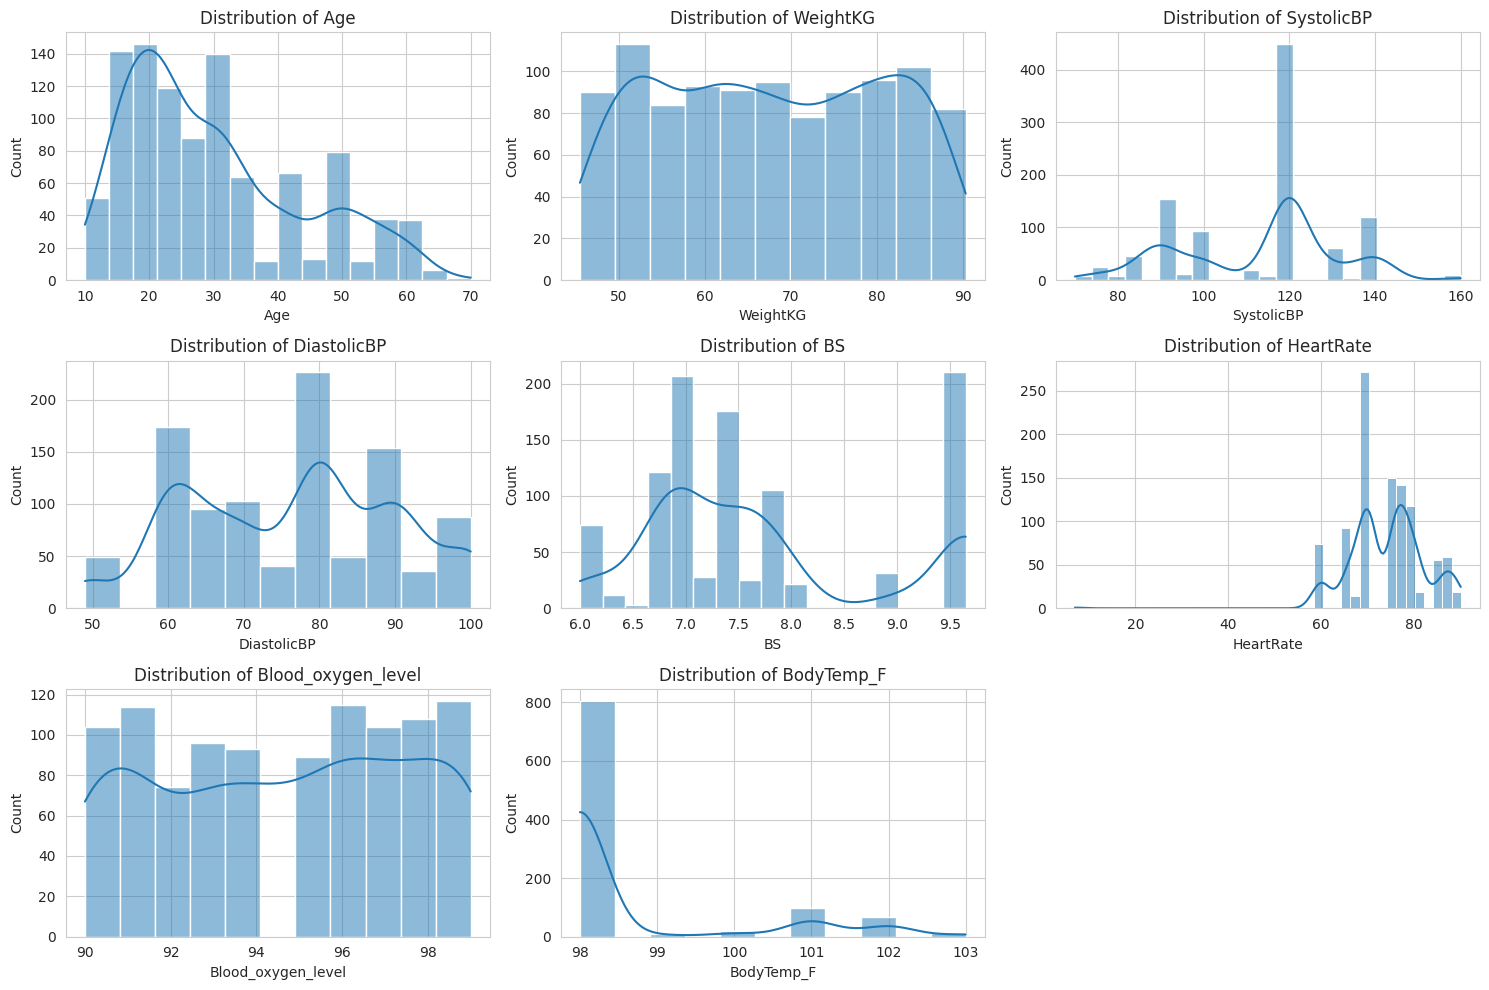

In [ ]:
sns.set_style("whitegrid")

# List of columns for which we will plot histograms
hist_columns = ['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'Blood_oxygen_level', 'BodyTemp_F']

# Plot histograms for each of the specified columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(hist_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

**After Outlier Handling**

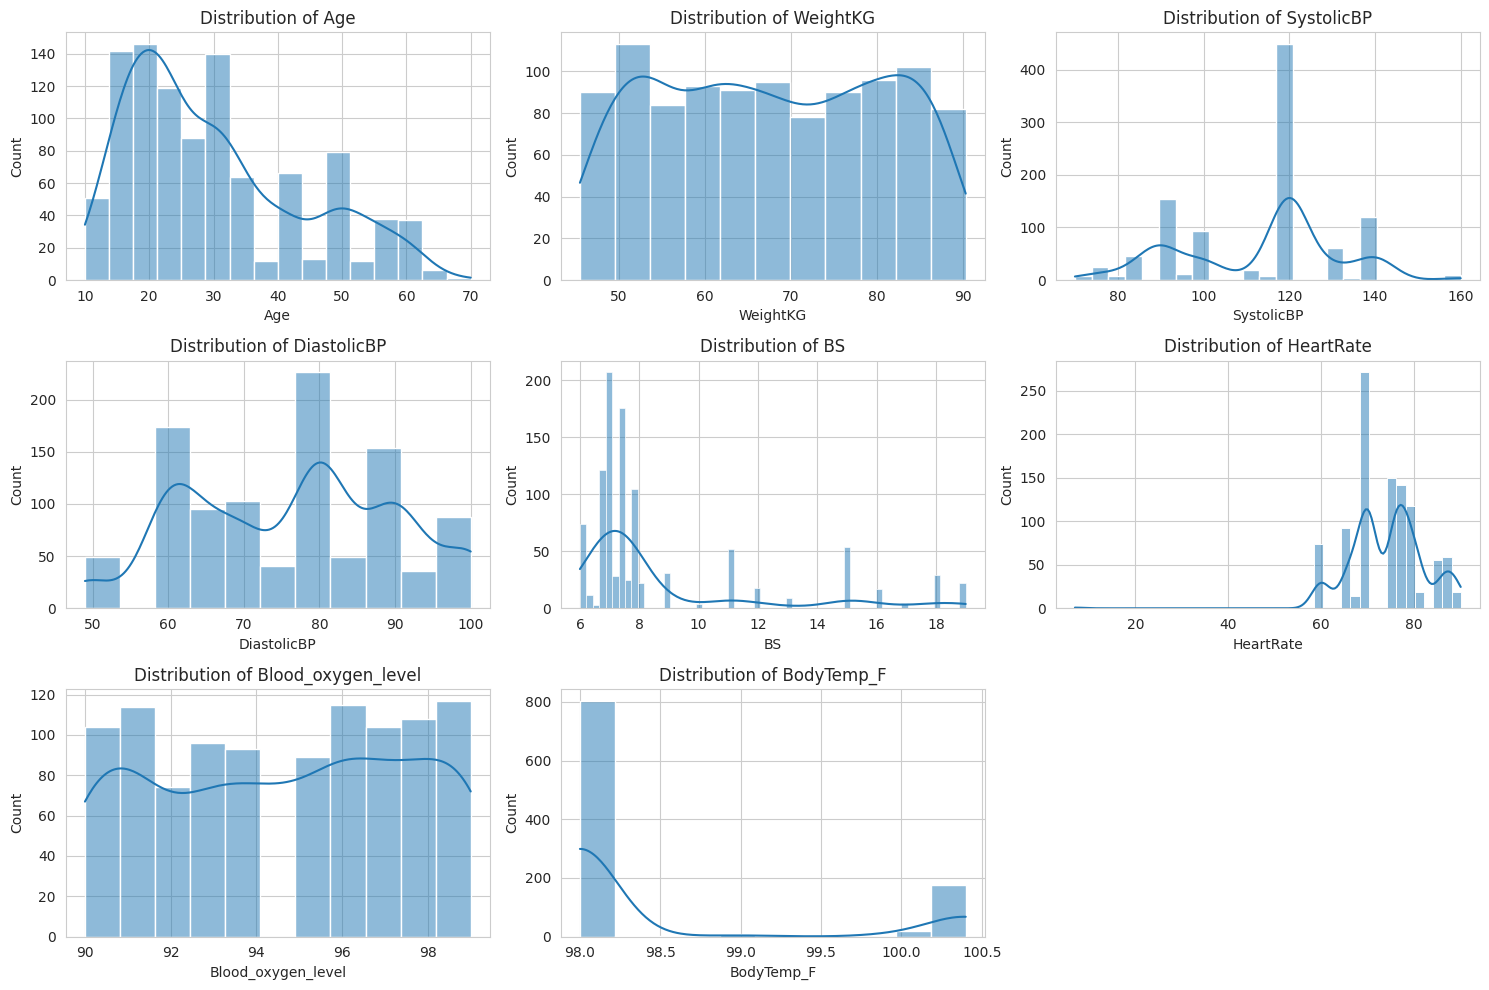

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of columns for which we will plot histograms
hist_columns = ['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'Blood_oxygen_level', 'BodyTemp_F']

# Plot histograms for each of the specified columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(hist_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_capped[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

**III. Data Preprocessing**

In [ ]:
data_clean = data_capped.copy()

Converting categorical values in the "RiskLevel" column of a DataFrame into numerical values

In [ ]:
# Encoding for original dataset
# "low risk": 0,
# "mid risk": 1,
# "high risk": 2
risk_map = {"low risk": 0, "mid risk": 1, "high risk": 2}
df["RiskLevel"] = df["RiskLevel"].map(risk_map)
df

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0      25      71.6         130           80  9.65         86   
1      35      86.4         140           90  9.65         70   
2      29      57.3          90           70  8.00         80   
3      30      81.0         140           85  7.00         70   
4      35      47.7         120           60  6.10         76   
...   ...       ...         ...          ...   ...        ...   
1009   22      61.8         120           60  9.65         80   
1010   55      50.8         120           90  9.65         60   
1011   35      81.2          85           60  9.65         86   
1012   43      58.1         120           90  9.65         70   
1013   32      53.5         120           65  6.00         76   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                     91        98.0        36.7          2  
1                     96        98.0        36.7          2  
2                     98       100.0        37.8          2  
3                     94        98.0        36.7          2  
4                     98        98.0        36.7          0  
...                  ...         ...         ...        ...  
1009                  99        98.0        36.7          2  
1010                  92        98.0        36.7          2  
1011                  91        98.0        36.7          2  
1012                  96        98.0        36.7          2  
1013                  94       101.0        38.3          1  

[1014 rows x 10 columns]

In [ ]:
# Encoding outlier handled dataset
# "low risk": 0,
# "mid risk": 1,
# "high risk": 2
risk_map = {"low risk": 0, "mid risk": 1, "high risk": 2}
data_clean["RiskLevel"] = data_clean["RiskLevel"].map(risk_map)
data_clean

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0      25      71.6         130           80  15.0         86   
1      35      86.4         140           90  13.0         70   
2      29      57.3          90           70   8.0         80   
3      30      81.0         140           85   7.0         70   
4      35      47.7         120           60   6.1         76   
...   ...       ...         ...          ...   ...        ...   
1009   22      61.8         120           60  15.0         80   
1010   55      50.8         120           90  18.0         60   
1011   35      81.2          85           60  19.0         86   
1012   43      58.1         120           90  18.0         70   
1013   32      53.5         120           65   6.0         76   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                     91        98.0        36.7          2  
1                     96        98.0        36.7          2  
2                     98       100.0        37.8          2  
3                     94        98.0        36.7          2  
4                     98        98.0        36.7          0  
...                  ...         ...         ...        ...  
1009                  99        98.0        36.7          2  
1010                  92        98.0        36.7          2  
1011                  91        98.0        36.7          2  
1012                  96        98.0        36.7          2  
1013                  94       100.4        38.0          1  

[1014 rows x 10 columns]

Body Temperature conversion from Celsius to Farenheit

In [ ]:
# Cross-checking the BodyTemp_F and BodyTemp_C columns for consistency
# The formula to convert Celsius to Fahrenheit is: (Celsius * 9/5) + 32 = Fahrenheit
# We will add a small tolerance for any minor rounding differences that may occur in the dataset

# Calculate the expected Fahrenheit values from the Celsius values in the dataset

expected_bodytemp_f = (data_clean['BodyTemp_C'] * 9/5) + 32

# Check for discrepancies beyond a small tolerance (e.g., 0.1 degree)
temperature_discrepancy = abs(expected_bodytemp_f - data_clean['BodyTemp_F']) > 0.1

# Count the number of discrepancies
num_discrepancies = temperature_discrepancy.sum()

# Display any rows where the discrepancy exists
discrepancy_rows = data_clean[temperature_discrepancy]

In [ ]:
discrepancy_rows

Empty DataFrame
Columns: [Age, WeightKG, SystolicBP, DiastolicBP, BS, HeartRate, Blood_oxygen_level, BodyTemp_F, BodyTemp_C, RiskLevel]
Index: []

Heart Rate Range

To take Bradycardia patients into account we placed a threshold of 40 bpm

In [ ]:
# Check the entry/entries with very low heart rate
low_heart_rate = data_clean[data_clean['HeartRate'] < 40]  # 40 bpm is a threshold for bradycardia

num_discrepancies, discrepancy_rows, low_heart_rate

(np.int64(0),
 Empty DataFrame
 Columns: [Age, WeightKG, SystolicBP, DiastolicBP, BS, HeartRate, Blood_oxygen_level, BodyTemp_F, BodyTemp_C, RiskLevel]
 Index: [],
      Age  WeightKG  SystolicBP  DiastolicBP   BS  HeartRate  \
 499   16      66.5         120           75  7.9          7   
 908   16      85.4         120           75  7.9          7   
 
      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
 499                  99        98.0        36.7          0  
 908                  95        98.0        36.7          0  )

Upon checking for consistency between BodyTemp_F and BodyTemp_C, we found no discrepancies in the dataset within the given tolerance, which is good news.

However, we have identified two entries where the HeartRate is recorded as 7 beats per minute. This is not physiologically plausible for a living person and likely represents a data entry error. Given that these are likely incorrect, we will need to remove these entries and replace these entries with a mean or median heart rate.
The extreme low heart rate values have been replaced with the mean heart rate of approximately 74.43 beats per minute. This change has been applied to the two identified records.

In [ ]:
# Calculate the mean heart rate, excluding the extreme low values
mean_heart_rate = data_clean[data_clean['HeartRate'] >= 40]['HeartRate'].mean()

# Replace the extreme low heart rate values with the mean
data_clean.loc[data_clean['HeartRate'] < 40, 'HeartRate'] = mean_heart_rate

# Verify the replacement
low_heart_rate_replaced = data_clean.loc[[499, 908], 'HeartRate']
mean_heart_rate, low_heart_rate_replaced

(np.float64(74.43478260869566),
 499    74.434783
 908    74.434783
 Name: HeartRate, dtype: float64)

In [ ]:
# Checking for invalid values in numerical columns

# Define the plausible ranges for each feature based on physiological norms and common sense
plausible_ranges = {
    'SystolicBP': (70, 160),  # Systolic blood pressure range (mmHg)
    'DiastolicBP': (40, 100),  # Diastolic blood pressure range (mmHg)
    'HeartRate': (40, 200),  # Heart rate range (bpm)
    'BodyTemp_F': (97, 100.4),  # Normal body temperature range (°F)
    'BodyTemp_C': (35,38),
    'Age': (12, 54),  # Typical childbearing age range
    'BS' : (6,11.1)

}

# Find and display invalid values for each feature
invalid_values = {}
for feature, (low, high) in plausible_ranges.items():
    invalid_values[feature] = data_clean[
        (data_clean[feature] < low) |
        (data_clean[feature] > high)
    ][feature]

invalid_values

{'SystolicBP': Series([], Name: SystolicBP, dtype: int64),
 'DiastolicBP': Series([], Name: DiastolicBP, dtype: int64),
 'HeartRate': Series([], Name: HeartRate, dtype: float64),
 'BodyTemp_F': Series([], Name: BodyTemp_F, dtype: float64),
 'BodyTemp_C': Series([], Name: BodyTemp_C, dtype: float64),
 'Age': 19      10
 36      60
 37      55
 54      60
 77      55
         ..
 968     55
 982     55
 1001    60
 1002    55
 1010    55
 Name: Age, Length: 86, dtype: int64,
 'BS': 0       15.0
 1       13.0
 9       18.0
 16      15.0
 20      18.0
         ... 
 1003    16.0
 1009    15.0
 1010    18.0
 1011    19.0
 1012    18.0
 Name: BS, Length: 154, dtype: float64}

**Observations:**

1. SystolicBP and DiastolicBP: No values fell outside the plausible physiological range we defined.
2. HeartRate: All values are now within the plausible range after we replaced the extreme low values with the mean heart rate.
3. BodyTemp_F: The outlier values have been handled within the range (98.0, 100.4)
4. Age: There are 86 entries with ages outside the typical childbearing age range of 12 to 45 years. The presence of ages like 10 years is clearly invalid, while ages above 45 could be possible but are very rare and might warrant further investigation, we are setting the range from 12 to 60.

In [ ]:
data_clean[(data_clean['Age'] <= 60) & (data_clean['Age'] >= 12)]

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0      25      71.6         130           80  15.0       86.0   
1      35      86.4         140           90  13.0       70.0   
2      29      57.3          90           70   8.0       80.0   
3      30      81.0         140           85   7.0       70.0   
4      35      47.7         120           60   6.1       76.0   
...   ...       ...         ...          ...   ...        ...   
1009   22      61.8         120           60  15.0       80.0   
1010   55      50.8         120           90  18.0       60.0   
1011   35      81.2          85           60  19.0       86.0   
1012   43      58.1         120           90  18.0       70.0   
1013   32      53.5         120           65   6.0       76.0   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                     91        98.0        36.7          2  
1                     96        98.0        36.7          2  
2                     98       100.0        37.8          2  
3                     94        98.0        36.7          2  
4                     98        98.0        36.7          0  
...                  ...         ...         ...        ...  
1009                  99        98.0        36.7          2  
1010                  92        98.0        36.7          2  
1011                  91        98.0        36.7          2  
1012                  96        98.0        36.7          2  
1013                  94       100.4        38.0          1  

[1002 rows x 10 columns]

In [ ]:
(data_clean[(data_clean['Age'] > 60) | (data_clean['Age'] < 12)]).count()

Age                   12
WeightKG              12
SystolicBP            12
DiastolicBP           12
BS                    12
HeartRate             12
Blood_oxygen_level    12
BodyTemp_F            12
BodyTemp_C            12
RiskLevel             12
dtype: int64

In [ ]:
# Investigating the entry with an age of 60
# Given the dataset context, it is very likely to be an error, so we will remove this entry
data_clean = data_clean[(data_clean['Age'] <= 60) & (data_clean['Age'] >= 12)]

# Verify the removal of the outlier age and the flagging of high temperatures
outlier_age_removed = data_clean[(data_clean['Age'] > 60) | (data_clean['Age'] < 12)]

outlier_age_removed

Empty DataFrame
Columns: [Age, WeightKG, SystolicBP, DiastolicBP, BS, HeartRate, Blood_oxygen_level, BodyTemp_F, BodyTemp_C, RiskLevel]
Index: []


**Removing Duplicates**

In [ ]:
# Remove the identified exact duplicate
maternal_health_df_cleaned = data_clean.drop_duplicates()
maternal_health_df_cleaned

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0      25      71.6         130           80  15.0       86.0   
1      35      86.4         140           90  13.0       70.0   
2      29      57.3          90           70   8.0       80.0   
3      30      81.0         140           85   7.0       70.0   
4      35      47.7         120           60   6.1       76.0   
...   ...       ...         ...          ...   ...        ...   
1009   22      61.8         120           60  15.0       80.0   
1010   55      50.8         120           90  18.0       60.0   
1011   35      81.2          85           60  19.0       86.0   
1012   43      58.1         120           90  18.0       70.0   
1013   32      53.5         120           65   6.0       76.0   

      Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                     91        98.0        36.7          2  
1                     96        98.0        36.7          2  
2                     98       100.0        37.8          2  
3                     94        98.0        36.7          2  
4                     98        98.0        36.7          0  
...                  ...         ...         ...        ...  
1009                  99        98.0        36.7          2  
1010                  92        98.0        36.7          2  
1011                  91        98.0        36.7          2  
1012                  96        98.0        36.7          2  
1013                  94       100.4        38.0          1  

[1001 rows x 10 columns]

**Show your Preprocssed Data:**

1.Heart Rate

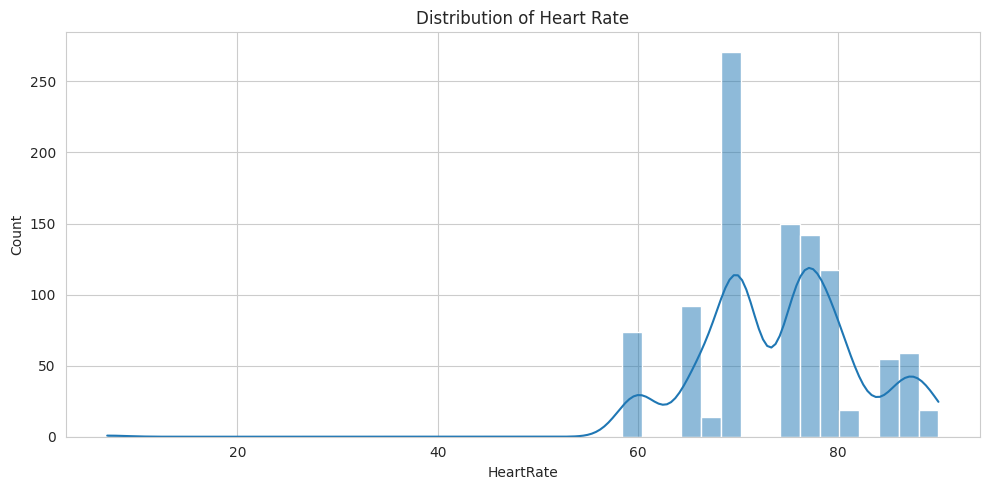

In [ ]:
#before
plt.figure(figsize=(10, 5))
sns.histplot(df['HeartRate'], kde=True)
plt.title(f'Distribution of Heart Rate')
plt.tight_layout()

plt.show()

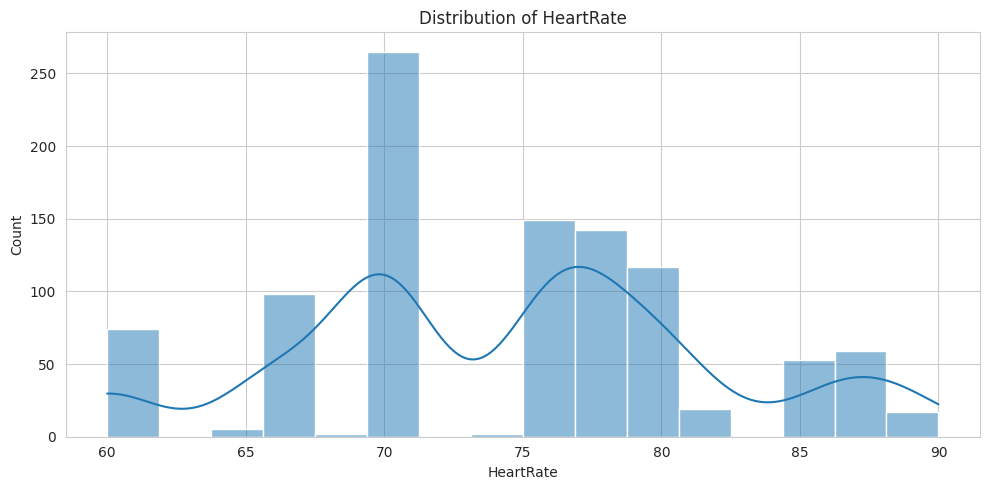

In [ ]:
#after
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['HeartRate'], kde=True)
plt.title(f'Distribution of HeartRate')
plt.tight_layout()

plt.show()

2. Age

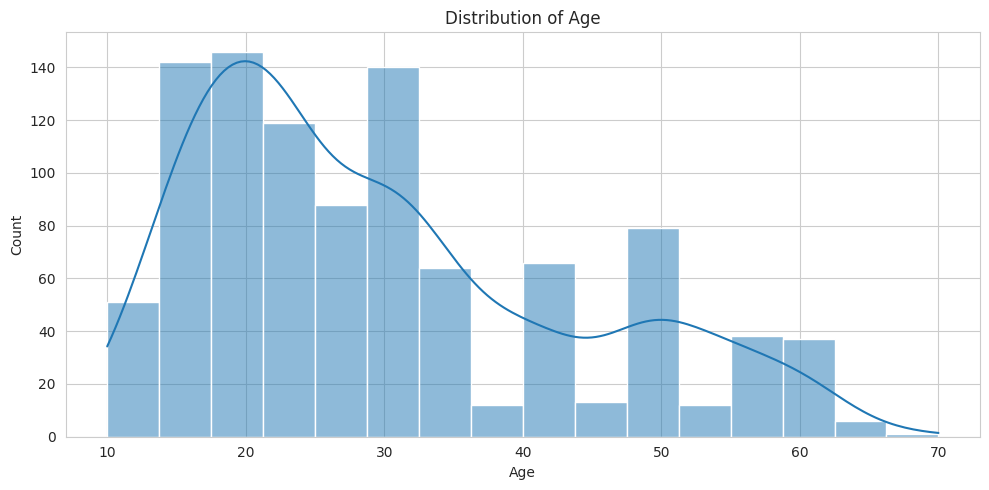

In [ ]:
#before
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True)
plt.title(f'Distribution of Age')
plt.tight_layout()

plt.show()

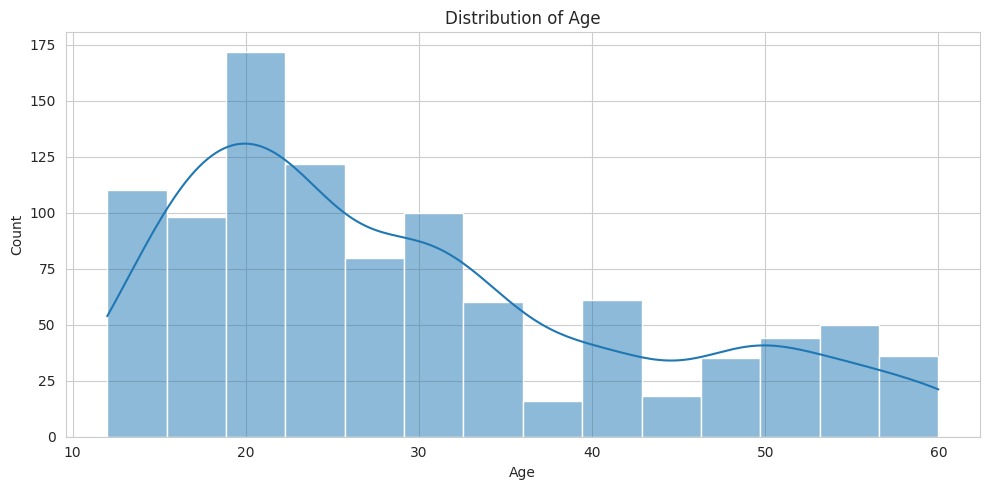

In [ ]:
#after
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['Age'], kde=True)
plt.title(f'Distribution of Age')
plt.tight_layout()

plt.show()

**IV. Preparation of Learning Data**

**Split the Data:**
Divide the dataset into learning, training and testing datasets.

In [ ]:
# Original Dataset
X=df.drop("RiskLevel", axis=1)
y = df.RiskLevel
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Processed Dataset
X_proc = maternal_health_df_cleaned.drop(["RiskLevel","BodyTemp_C"], axis=1)
y_proc = maternal_health_df_cleaned.RiskLevel
x_train_proc, x_test_proc, y_train_proc, y_test_proc = train_test_split(X_proc, y_proc, test_size=0.2, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
print(f"Processed data has {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")

Original data has 760 train data and 254 test data

Processed data has 800 train data and 201 test data


**Feature Selection**

1. Correlation

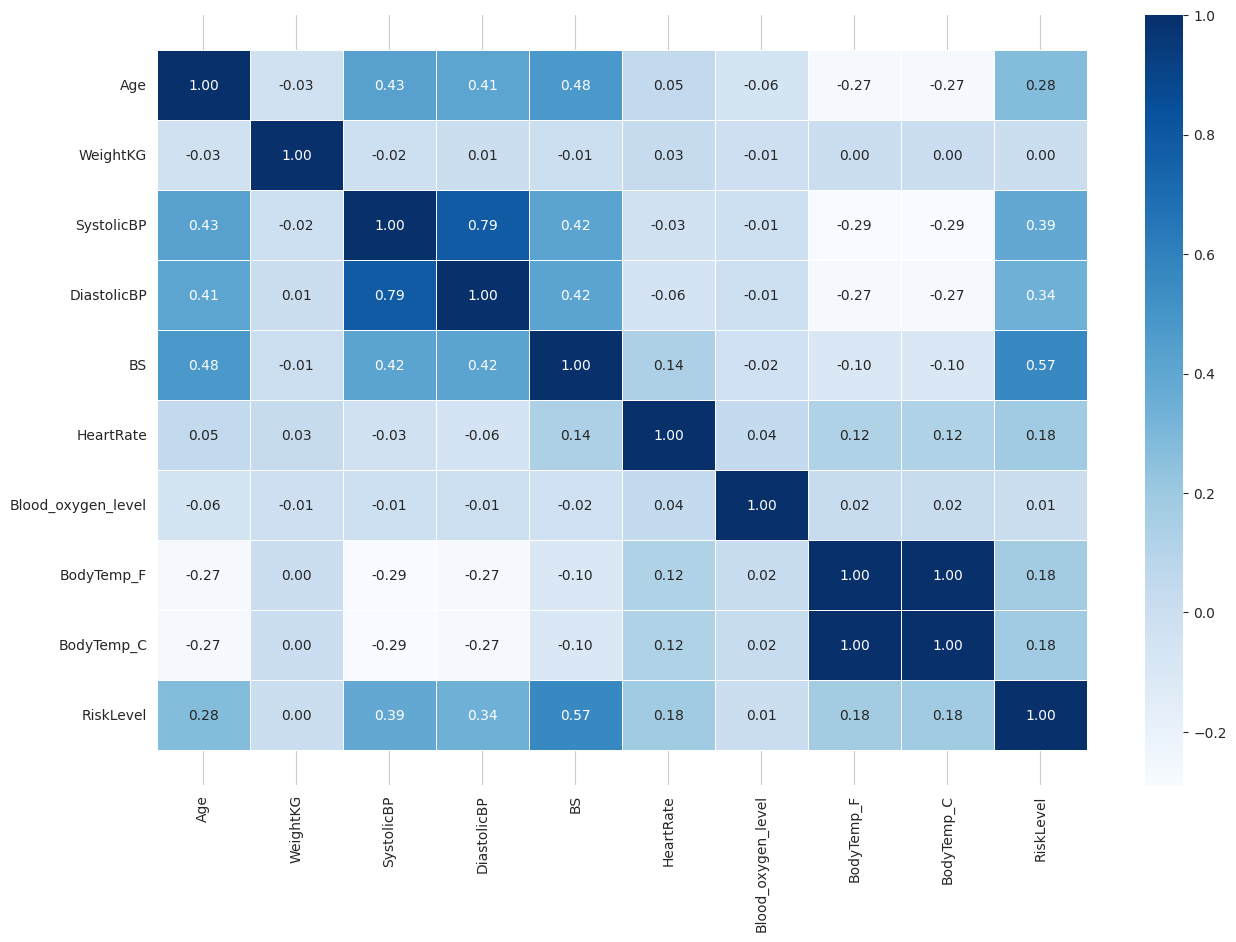

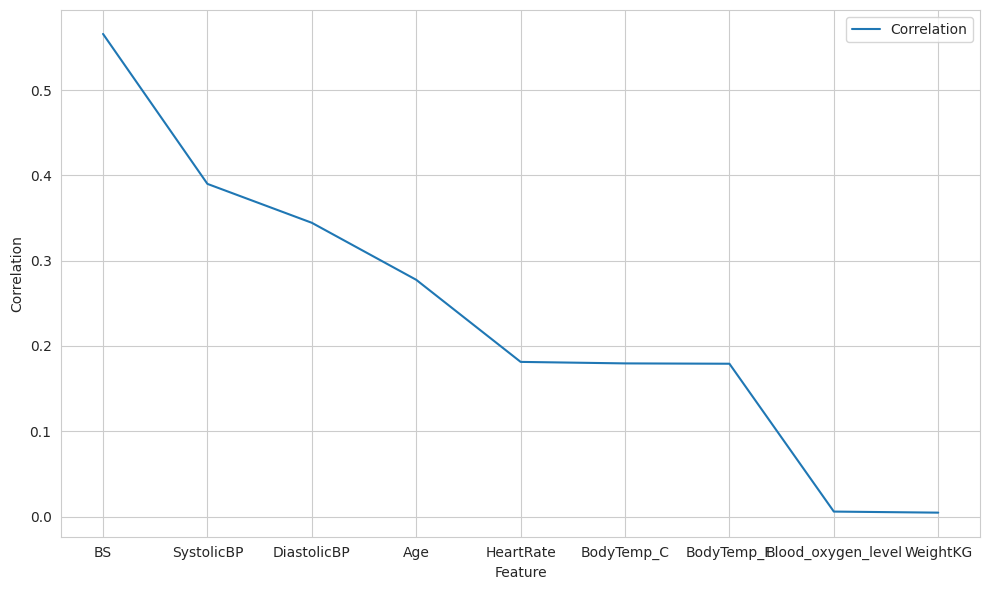

In [ ]:
# Correlation matrix
corr_matrix = maternal_health_df_cleaned.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "Blues");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Plot feature correlations with target variable
plt.figure(figsize=(10,6))
plt.plot(corr_matrix["RiskLevel"].sort_values(ascending=False)[1:], label="Correlation")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2. Chi Square

In [ ]:
# Separate features and target variable

# Drop one temperature measure to avoid redundancy
X = maternal_health_df_cleaned.drop(['RiskLevel','BodyTemp_C'], axis=1)
y = maternal_health_df_cleaned['RiskLevel']

# Apply SelectKBest with the Chi-Squared statistical test
# Since we don't know the optimal number of features, let's select the top 5 for now
k_best_features = SelectKBest(score_func=chi2, k=5)
fit = k_best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatenate dataframes for better visualization
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores.sort_values(by='Score', ascending=False, inplace=True)  # Sort the dataframe by the Score

# Get the features selected by SelectKBest
chi_square_features = feature_scores.nlargest(5, 'Score')['Feature'].values
feature_scores, chi_square_features

(              Feature       Score
 0                 Age  500.952941
 4                  BS  483.928304
 2          SystolicBP  457.927161
 3         DiastolicBP  354.634528
 5           HeartRate   25.986663
 1            WeightKG    1.051915
 7          BodyTemp_F    0.360810
 6  Blood_oxygen_level    0.007770,
 array(['Age', 'BS', 'SystolicBP', 'DiastolicBP', 'HeartRate'],
       dtype=object))

3. Forward Feature Selection

In [ ]:
# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize SequentialFeatureSelector object
sfs = SFS(rf_clf,
          k_features=5,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5)

# Perform SFS on the training data
sfs = sfs.fit(x_train_proc, y_train_proc)


[2025-03-20 13:41:42] Features: 1/5 -- score: 0.6387499999999999
[2025-03-20 13:41:49] Features: 2/5 -- score: 0.7349999999999999
[2025-03-20 13:41:54] Features: 3/5 -- score: 0.8099999999999999
[2025-03-20 13:41:59] Features: 4/5 -- score: 0.8225000000000001
[2025-03-20 13:42:04] Features: 5/5 -- score: 0.8275

In [ ]:
# Get the selected feature names based on the training set
FFS_features = x_train_proc.columns[list(sfs.k_feature_idx_)]
print('Selected features:', FFS_features)


Selected features: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate'], dtype='object')


4. Backward Feature Elimination

In [ ]:
# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize SequentialFeatureSelector object
sfs = SFS(rf_clf,
          k_features=5,
          forward=False,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5)

# Perform SFS on the training data
sfs = sfs.fit(x_train_proc, y_train_proc)


[2025-03-20 13:43:55] Features: 7/5 -- score: 0.7924999999999999
[2025-03-20 13:44:02] Features: 6/5 -- score: 0.8225
[2025-03-20 13:44:09] Features: 5/5 -- score: 0.8275

In [ ]:
# Get the selected feature names based on the training set
BFE_features = x_train_proc.columns[list(sfs.k_feature_idx_)]
print('Selected features:', BFE_features)

Selected features: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate'], dtype='object')


5. Recursive Feature Elimination

In [ ]:
# Apply Recursive Feature Elimination (RFE) with a Support Vector Machine (SVM) classifier
# Specifying the number of features to select for the model (k=5)
num_features_to_select = 5
svm_classifier = SVC(kernel="linear")
rfe = RFE(estimator=svm_classifier, n_features_to_select=num_features_to_select)
X_rfe = rfe.fit_transform(X_proc, y_proc)

In [ ]:
# Get the selected features from RFE
selected_features_rfe = X_proc.columns[rfe.support_].tolist()

# Print the selected features
print("Selected Features (RFE):", selected_features_rfe)

# RFE scores for each feature
feature_rfe_scores = rfe.ranking_

Selected Features (RFE): ['SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'BodyTemp_F']


In [ ]:
# Combine feature names and their corresponding RFE scores
feature_scores_rfe = pd.DataFrame({'Feature': X_proc.columns, 'RFE Score': feature_rfe_scores})
underlying_model = rfe.estimator_
print("Underlying model:", underlying_model)
# Print or display the selected features and their RFE scores
print("\nRFE Scores for Each Feature:")
print(feature_scores_rfe)

Underlying model: SVC(kernel='linear')

RFE Scores for Each Feature:
              Feature  RFE Score
0                 Age          3
1            WeightKG          4
2          SystolicBP          1
3         DiastolicBP          1
4                  BS          1
5           HeartRate          1
6  Blood_oxygen_level          2
7          BodyTemp_F          1


In [ ]:
RFE_features = selected_features_rfe
RFE_features

['SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'BodyTemp_F']

6. Random Forest Importance

In [ ]:
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_proc, y_train_proc)

print("Train accuracy:",random_forest.score(x_train_proc,y_train_proc))
print("Test accuracy:",random_forest.score(x_test_proc,y_test_proc))

y_pred = random_forest.predict(x_test_proc)
print(y_pred)
cm = confusion_matrix(y_test_proc, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_proc, y_pred)* 100 ,'%')
print(classification_report(y_test_proc, random_forest.predict(x_test_proc)))

Train accuracy: 1.0
Test accuracy: 0.7412935323383084
[2 1 2 1 0 2 2 1 1 1 0 0 1 1 0 0 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 0 0 1 2 2 0 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 0 0 2 1 0 2 0 2 0 2 1 0 0 1 0 1 0 1 1 0 2 0 1 1 0 1 0 2 2 0 1 2 0 1 1
 2 1 2 0 1 2 0 1 0 2 1 2 0 0 2 0 0 0 0 2 1 0 0 1 2 0 2 1 0 1 1 2 1 0 1 2 1
 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0]
CM: [[59 18  0]
 [19 46  5]
 [ 5  5 44]]
Accuracy: 74.12935323383084 %
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        77
           1       0.67      0.66      0.66        70
           2       0.90      0.81      0.85        54

    accuracy                           0.74       201
   macro avg       0.76      0.75      0.75       201
weighted avg       0.75      0.74      0.74       201



In [ ]:
y_pred = random_forest.predict(x_test_proc)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred)}")

Processed Dataset Accuracy: 0.7412935323383084


In [ ]:
feature_importances = random_forest.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X_proc.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

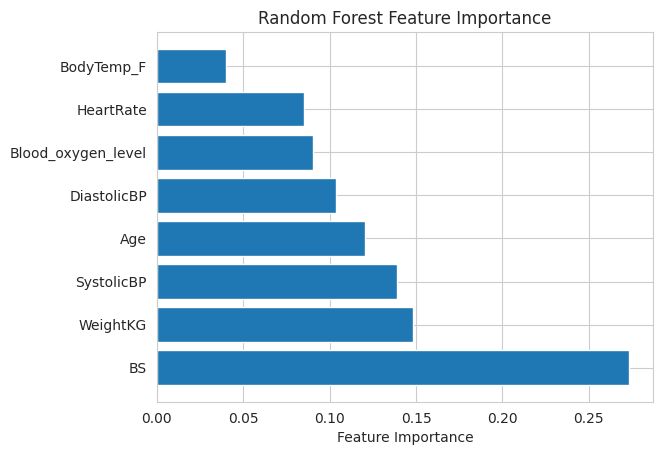

In [ ]:
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
# Select top N features
rfi_features = feature_importance_df.head(5)['Feature'].tolist()

# Subset the data with selected features
rfi_sel_features = X_proc[rfi_features]

rfi_sel_features

BS  WeightKG  SystolicBP  Age  DiastolicBP
0     15.0      71.6         130   25           80
1     13.0      86.4         140   35           90
2      8.0      57.3          90   29           70
3      7.0      81.0         140   30           85
4      6.1      47.7         120   35           60
...    ...       ...         ...  ...          ...
1009  15.0      61.8         120   22           60
1010  18.0      50.8         120   55           90
1011  19.0      81.2          85   35           60
1012  18.0      58.1         120   43           90
1013   6.0      53.5         120   32           65

[1001 rows x 5 columns]

7. Regularization L1 (LASSO)

In [ ]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 8, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X_proc, y_proc)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': np.float64(1e-05)}


In [ ]:
names=maternal_health_df_cleaned.drop(["RiskLevel","BodyTemp_C"], axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['Age' 'WeightKG' 'SystolicBP' 'DiastolicBP' 'BS' 'HeartRate'
 'Blood_oxygen_level' 'BodyTemp_F']


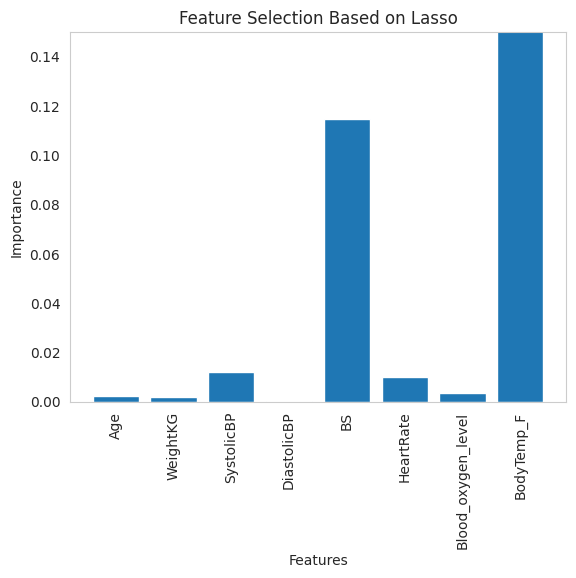

In [ ]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(x_train_proc, y_train_proc)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [ ]:
# Sort indices based on the absolute values of lasso1 coefficients in descending order
sorted_indices = np.argsort(lasso1_coef)[::-1]

# Sort coefficients and feature names accordingly
sorted_coef = lasso1_coef[sorted_indices]
sorted_names = np.array(names)[sorted_indices]

LASSO_features = sorted_names[:5]

LASSO_features

array(['BodyTemp_F', 'BS', 'SystolicBP', 'HeartRate',
       'Blood_oxygen_level'], dtype=object)

8. Regularization L2 (Ridge)

In [ ]:
# Standardize the features
scaler = StandardScaler()
x_train_proc_scaled = scaler.fit_transform(x_train_proc)
x_test_proc_scaled = scaler.transform(x_test_proc)

In [ ]:
# Parameters to be tested on GridSearchCV
params = {"alpha": np.arange(0.00001, 8, 500)}

# Number of Folds and adding the random state for replication
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Initializing the Model
ridge = Ridge()

# GridSearchCV with model, params, and folds.
ridge_cv = GridSearchCV(ridge, param_grid=params, cv=kf)
ridge_cv.fit(x_train_proc_scaled, y_train_proc)
print("Best Params {}".format(ridge_cv.best_params_))

# Calling the model with the best parameter
ridge_model = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_model.fit(x_train_proc_scaled, y_train_proc)

Best Params {'alpha': np.float64(1e-05)}


Ridge(alpha=np.float64(1e-05))

In [ ]:
# Get the coefficients and feature names
ridge_coef = np.abs(ridge_model.coef_)
names = x_train_proc.columns

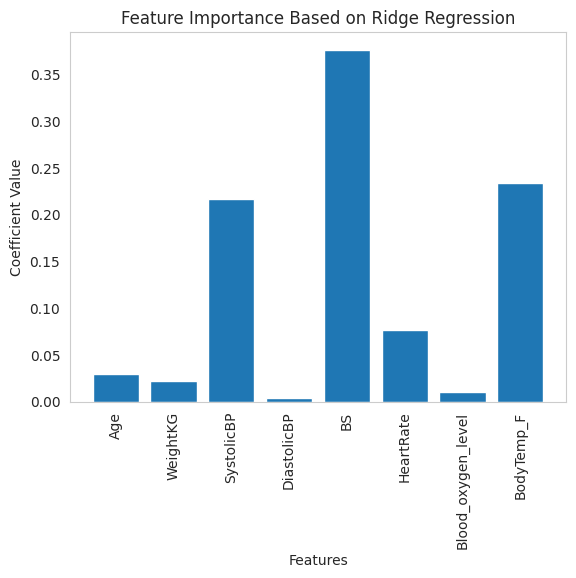

In [ ]:
# Plotting the Column Names and Importance of Columns.
plt.bar(names, ridge_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Importance Based on Ridge Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()
# Subsetting the features which have non-zero coefficients.
feature_subset = np.array(names)[ridge_coef != 0]

In [ ]:
# Get the indices that would sort the coefficients in ascending order
sorted_indices_desc = np.argsort(ridge_coef)[::-1]

# Use the sorted indices to get the names and coefficients in ascending order
feature_subset_sorted = np.array(names)[sorted_indices_desc]
ridge_coef_sorted = ridge_coef[sorted_indices_desc]

print("Selected Feature Columns (Sorted in Descending Order): {}".format(feature_subset_sorted))
print("Corresponding Coefficients (Sorted): {}".format(ridge_coef_sorted))

Selected Feature Columns (Sorted in Descending Order): ['BS' 'BodyTemp_F' 'SystolicBP' 'HeartRate' 'Age' 'WeightKG'
 'Blood_oxygen_level' 'DiastolicBP']
Corresponding Coefficients (Sorted): [0.37647988 0.23367364 0.21649821 0.07644939 0.02919846 0.02253228
 0.01060695 0.00376237]


In [ ]:
Ridge_features = feature_subset[:5]
Ridge_features

array(['Age', 'WeightKG', 'SystolicBP', 'DiastolicBP', 'BS'], dtype=object)

**Evaluate Models Performance:**
Train machine learning models using the selected features and evaluate their performance on the testing set. Measure metrics such as accuracy, precision, recall, and F1 score.

In [ ]:
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']

In [ ]:
best_accuracies = []

Cleaned Dataset

In [ ]:
f1ScoresTable = []
recallScoresTable = []
accuracyTable = []
precisionTable = []

In [ ]:
# Apply Logistic Regression Algorithm

clf = LogisticRegression()
clf.fit(x_train_proc,y_train_proc)

 # testing model
y_pred = clf.predict(x_test_proc)

print("Train accuracy:",clf.score(x_train_proc,y_train_proc))
print("Test accuracy:",clf.score(x_test_proc,y_test_proc))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_proc, y_pred, average='weighted')
precision = precision_score(y_test_proc, y_pred, average='weighted')
recall = recall_score(y_test_proc, y_pred, average='weighted')
accuracy = accuracy_score(y_test_proc, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_proc, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_proc, y_pred)* 100 ,'%')
print(classification_report(y_test_proc, clf.predict(x_test_proc)))

Train accuracy: 0.61625
Test accuracy: 0.5572139303482587
F1 Score:  0.5549889896588153
Precision Score:  0.57084215884275
Recall Score:  0.5572139303482587
accuracy:  0.5572139303482587
CM: [[53 22  2]
 [33 29  8]
 [15  9 30]]
Accuracy: 55.72139303482587 %
              precision    recall  f1-score   support

           0       0.52      0.69      0.60        77
           1       0.48      0.41      0.45        70
           2       0.75      0.56      0.64        54

    accuracy                           0.56       201
   macro avg       0.59      0.55      0.56       201
weighted avg       0.57      0.56      0.55       201



2. SVC

In [ ]:
#Applying SVC (Support Vector Classification)

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_proc, y_train_proc)

y_pred = svm.predict(x_test_proc)

print("Train accuracy:",svm.score(x_train_proc,y_train_proc))
print("Test accuracy:",svm.score(x_test_proc,y_test_proc))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_proc, y_pred, average='weighted')
precision = precision_score(y_test_proc, y_pred, average='weighted')
recall = recall_score(y_test_proc, y_pred, average='weighted')
accuracy = accuracy_score(y_test_proc, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_proc, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_proc, y_pred)* 100 ,'%')
print(classification_report(y_test_proc, svm.predict(x_test_proc)))

Train accuracy: 0.985
Test accuracy: 0.4626865671641791
F1 Score:  0.41234366334214384
Precision Score:  0.5799121675572754
Recall Score:  0.4626865671641791
accuracy:  0.4626865671641791
[2 1 2 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 2 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 2 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 1 0 0 0 0 0 2 1 0 1 0 2 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
CM: [[67 10  0]
 [55 13  2]
 [40  1 13]]
Accuracy: 46.26865671641791 %
              precision    recall  f1-score   support

           0       0.41      0.87      0.56        77
           1       0.54      0.19      0.28        70
           2       0.87      0.24      0.38        54

    accuracy                           0.46       201
   macro avg       0.61      0.43      0.40       201
weight

3. Decision Tree Classifier

In [ ]:
#Applying Decision Tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_proc, y_train_proc)

y_pred = decision_tree.predict(x_test_proc)

print("Train accuracy:",decision_tree.score(x_train_proc,y_train_proc))
print("Test accuracy:",decision_tree.score(x_test_proc,y_test_proc))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_proc, y_pred, average='weighted')
precision = precision_score(y_test_proc, y_pred, average='weighted')
recall = recall_score(y_test_proc, y_pred, average='weighted')
accuracy = accuracy_score(y_test_proc, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_proc, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_proc, y_pred)* 100 ,'%')
print(classification_report(y_test_proc, decision_tree.predict(x_test_proc) ))

Train accuracy: 1.0
Test accuracy: 0.736318407960199
F1 Score:  0.7386006576978053
Precision Score:  0.7461163229262562
Recall Score:  0.736318407960199
accuracy:  0.736318407960199
[2 1 2 1 0 2 2 1 1 1 0 2 1 1 0 1 2 1 2 2 0 2 0 1 2 2 2 0 1 2 0 1 1 1 1 1 1
 1 1 1 0 0 2 2 1 1 2 0 2 1 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 0 2 2 0 1 0 1 2 1 2 0 2 1 0 2 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1
 0 0 0 1 2 1 0 2 0 2 0 2 1 0 1 1 2 1 1 1 1 0 2 1 1 1 0 0 0 1 2 1 1 2 0 1 1
 2 1 2 0 1 1 0 2 1 2 1 2 0 0 2 1 0 1 0 2 1 0 0 1 2 0 2 1 0 1 2 2 1 0 1 2 1
 0 0 1 1 0 0 0 0 0 1 1 2 0 0 0 1]
CM: [[53 23  1]
 [13 50  7]
 [ 1  8 45]]
Accuracy: 73.6318407960199 %
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        77
           1       0.62      0.71      0.66        70
           2       0.85      0.83      0.84        54

    accuracy                           0.74       201
   macro avg       0.75      0.75      0.75       201
weighted avg 

4.Random Forest Classifier

In [ ]:
#Applying RandomForest
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_proc, y_train_proc)

y_pred = random_forest.predict(x_test_proc)

print("Train accuracy:",random_forest.score(x_train_proc,y_train_proc))
print("Test accuracy:",random_forest.score(x_test_proc,y_test_proc))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_proc, y_pred, average='weighted')
precision = precision_score(y_test_proc, y_pred, average='weighted')
recall = recall_score(y_test_proc, y_pred, average='weighted')
accuracy = accuracy_score(y_test_proc, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)

#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test_proc, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_proc, y_pred)* 100 ,'%')
print(classification_report(y_test_proc, random_forest.predict(x_test_proc)))

Train accuracy: 1.0
Test accuracy: 0.746268656716418
F1 Score:  0.7461271220519116
Precision Score:  0.7490139929626831
Recall Score:  0.746268656716418
accuracy:  0.746268656716418
[2 1 2 0 0 2 2 1 1 1 0 1 1 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 2 2 0 1 1 1 1 1 1
 0 1 0 0 1 2 2 0 1 2 0 2 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 2 1 0 2 0 2 0 2 1 0 0 1 0 1 0 1 1 0 2 0 1 1 0 1 0 2 2 0 1 2 0 1 1
 2 1 2 0 0 1 0 2 0 2 1 2 0 0 2 0 0 0 0 2 1 0 0 1 2 0 2 1 0 1 1 2 1 0 1 2 1
 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0]
CM: [[60 17  0]
 [21 44  5]
 [ 5  3 46]]
Accuracy: 74.6268656716418 %
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        77
           1       0.69      0.63      0.66        70
           2       0.90      0.85      0.88        54

    accuracy                           0.75       201
   macro avg       0.76      0.75      0.76       201
weighted avg 

**5. XGBoost Classifier**

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_proc, y_train_proc)

y_pred = xgb_clf.predict(x_test_proc)

print("Train accuracy:",xgb_clf.score(x_train_proc,y_train_proc))
print("Test accuracy:",xgb_clf.score(x_test_proc,y_test_proc))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_proc, y_pred, average='weighted')
precision = precision_score(y_test_proc, y_pred, average='weighted')
recall = recall_score(y_test_proc, y_pred, average='weighted')
accuracy = accuracy_score(y_test_proc, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)

#Store these values
f1ScoresTable.append(f1_score_value)
precisionTable.append(precision)
recallScoresTable.append(recall)
accuracyTable.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_proc, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_proc, y_pred)* 100 ,'%')
print(classification_report(y_test_proc, xgb_clf.predict(x_test_proc)))

Train accuracy: 1.0
Test accuracy: 0.7313432835820896
F1 Score:  0.7347831167649795
Precision Score:  0.741905002558258
Recall Score:  0.7313432835820896
accuracy:  0.7313432835820896
[2 1 2 1 0 2 2 0 1 0 0 1 0 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 2 2 0 1 1 1 1 0 1
 1 1 0 0 1 1 2 0 1 2 0 1 0 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 1 2 1 0 2 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1
 0 1 0 1 2 1 0 2 1 2 0 2 1 0 0 1 0 1 0 1 1 0 2 0 1 1 1 1 0 1 2 0 1 2 0 1 0
 2 1 2 0 0 2 0 1 1 2 1 2 0 0 2 1 0 0 0 2 1 0 0 1 2 0 1 1 0 1 1 2 1 0 1 2 1
 0 0 0 0 0 0 0 0 0 1 1 2 0 1 0 0]
CM: [[57 20  0]
 [20 47  3]
 [ 4  7 43]]
Accuracy: 73.13432835820896 %
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        77
           1       0.64      0.67      0.65        70
           2       0.93      0.80      0.86        54

    accuracy                           0.73       201
   macro avg       0.76      0.74      0.74       201
weighted a

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTable)
# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTable))
# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTable))

Best Model: Random Forest
Best Accuracy: 0.746268656716418


Chi Squared Feature Selection

In [ ]:
# Processed Dataset
X_chi = maternal_health_df_cleaned[chi_square_features]
y_chi = maternal_health_df_cleaned.RiskLevel
x_train_chi, x_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi, y_chi, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableChi = []
recallScoresTableChi = []
accuracyTableChi = []
precisionTableChi = []

**1. Logistic Regression**

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_chi,y_train_chi)

 # testing model
y_pred = clf.predict(x_test_chi)

print("Train accuracy:",clf.score(x_train_chi,y_train_chi))
print("Test accuracy:",clf.score(x_test_chi,y_test_chi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, clf.predict(x_test_chi)))

Train accuracy: 0.56375
Test accuracy: 0.5174129353233831
F1 Score:  0.5093974192182533
Precision Score:  0.533150065488374
Recall Score:  0.5174129353233831
accuracy:  0.5174129353233831
CM: [[54 20  3]
 [35 26  9]
 [22  8 24]]
Accuracy: 51.741293532338304 %
              precision    recall  f1-score   support

           0       0.49      0.70      0.57        77
           1       0.48      0.37      0.42        70
           2       0.67      0.44      0.53        54

    accuracy                           0.52       201
   macro avg       0.54      0.51      0.51       201
weighted avg       0.53      0.52      0.51       201



2. SVC

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_chi, y_train_chi)

y_pred = svm.predict(x_test_chi)

print("Train accuracy:",svm.score(x_train_chi,y_train_chi))
print("Test accuracy:",svm.score(x_test_chi,y_test_chi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, svm.predict(x_test_chi)))

Train accuracy: 0.83625
Test accuracy: 0.7313432835820896
F1 Score:  0.731227060387257
Precision Score:  0.7379131509983206
Recall Score:  0.7313432835820896
accuracy:  0.7313432835820896
[0 1 2 1 0 0 2 2 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 0 1 1 1 2 1
 0 1 1 0 0 1 2 1 1 2 0 1 0 0 0 0 0 0 2 0 2 0 1 0 2 1 1 0 1 1 0 2 2 1 0 0 1
 1 1 2 0 0 2 0 1 0 0 2 1 2 0 2 1 0 2 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 2 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 2 0 1 2 0 1 0
 2 1 2 0 0 1 0 1 0 2 1 2 1 0 2 0 0 0 1 2 1 0 0 1 1 0 1 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 1 0 0 0]
CM: [[63 14  0]
 [19 45  6]
 [ 7  8 39]]
Accuracy: 73.13432835820896 %
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        77
           1       0.67      0.64      0.66        70
           2       0.87      0.72      0.79        54

    accuracy                           0.73       201
   macro avg       0.75      0.73      0.73       201
weight

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_chi, y_train_chi)

y_pred = decision_tree.predict(x_test_chi)

print("Train accuracy:",decision_tree.score(x_train_chi,y_train_chi))
print("Test accuracy:",decision_tree.score(x_test_chi,y_test_chi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)

#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, decision_tree.predict(x_test_chi) ))

Train accuracy: 0.935
Test accuracy: 0.8308457711442786
F1 Score:  0.8318720759696462
Precision Score:  0.8340532630962832
Recall Score:  0.8308457711442786
accuracy:  0.8308457711442786
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 0 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[63 14  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 83.08457711442786 %
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        77
           1       0.76      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.84       201
weighte

4.Random Forest Classifier

In [ ]:
#Applying RandomForest

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_chi, y_train_chi)

y_pred = random_forest.predict(x_test_chi)

print("Train accuracy:",random_forest.score(x_train_chi,y_train_chi))
print("Test accuracy:",random_forest.score(x_test_chi,y_test_chi))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, random_forest.predict(x_test_chi)))

Train accuracy: 0.935
Test accuracy: 0.8208955223880597
F1 Score:  0.8221653636579009
Precision Score:  0.825499270915221
Recall Score:  0.8208955223880597
accuracy:  0.8208955223880597
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[61 16  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 82.08955223880598 %
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.74      0.81      0.78        70
           2       0.92      0.87      0.90        54

    accuracy                           0.82       201
   macro avg       0.83      0.83      0.83       201
weighted

5. XGBoost Classifier

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_chi, y_train_chi)

y_pred = xgb_clf.predict(x_test_chi)

print("Train accuracy:",xgb_clf.score(x_train_chi,y_train_chi))
print("Test accuracy:",xgb_clf.score(x_test_chi,y_test_chi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_chi, y_pred, average='weighted')
precision = precision_score(y_test_chi, y_pred, average='weighted')
recall = recall_score(y_test_chi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_chi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableChi.append(f1_score_value)
precisionTableChi.append(precision)
recallScoresTableChi.append(recall)
accuracyTableChi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_chi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_chi, y_pred)* 100 ,'%')
print(classification_report(y_test_chi, xgb_clf.predict(x_test_chi)))

Train accuracy: 0.935
Test accuracy: 0.8258706467661692
F1 Score:  0.8268314894286669
Precision Score:  0.8289454687347576
Recall Score:  0.8258706467661692
accuracy:  0.8258706467661692
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 0 0 0 0]
CM: [[62 15  0]
 [ 9 57  4]
 [ 4  3 47]]
Accuracy: 82.58706467661692 %
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        77
           1       0.76      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.83       201
weighte

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableChi)
# Get the name of the best model
best_model = models[best_model_index]

best_accuracies.append(np.max(accuracyTableChi))
# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableChi))

Best Model: DecisionTree
Best Accuracy: 0.8308457711442786


###Recursive Feature Elimination

In [ ]:
# Processed Dataset
x_rfe = maternal_health_df_cleaned[RFE_features]
y_rfe = maternal_health_df_cleaned.RiskLevel
x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = train_test_split(x_rfe, y_rfe, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableRFE = []
recallScoresTableRFE = []
accuracyTableRFE = []
precisionTableRFE = []

1. Logistic Regression

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_rfe,y_train_rfe)

 # testing model
y_pred = clf.predict(x_test_rfe)

print("Train accuracy:",clf.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",clf.score(x_test_rfe,y_test_rfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, clf.predict(x_test_rfe)))

Train accuracy: 0.5825
Test accuracy: 0.5323383084577115
F1 Score:  0.5230464937735039
Precision Score:  0.5402900029765701
Recall Score:  0.5323383084577115
accuracy:  0.5323383084577115
CM: [[56 21  0]
 [38 22 10]
 [14 11 29]]
Accuracy: 53.233830845771145 %
              precision    recall  f1-score   support

           0       0.52      0.73      0.61        77
           1       0.41      0.31      0.35        70
           2       0.74      0.54      0.62        54

    accuracy                           0.53       201
   macro avg       0.56      0.53      0.53       201
weighted avg       0.54      0.53      0.52       201



2. SVC

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_rfe, y_train_rfe)
y_pred = svm.predict(x_test_rfe)

print("Train accuracy:",svm.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",svm.score(x_test_rfe,y_test_rfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, svm.predict(x_test_rfe)))

Train accuracy: 0.785
Test accuracy: 0.6666666666666666
F1 Score:  0.6593095809258896
Precision Score:  0.6675544112322485
Recall Score:  0.6666666666666666
accuracy:  0.6666666666666666
[0 1 2 0 0 0 2 0 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 2 1 1 1 0 1
 0 1 1 0 1 2 2 0 0 2 1 2 1 1 0 0 0 0 0 0 2 0 0 2 2 0 1 0 0 0 0 2 2 1 0 0 2
 1 1 2 2 0 2 0 1 0 0 2 1 2 0 2 1 0 2 0 0 0 0 0 1 0 0 0 2 1 0 0 0 1 0 0 0 0
 0 0 0 0 2 0 0 2 0 2 0 2 1 0 0 0 0 0 0 1 1 0 2 0 1 0 1 1 0 2 2 0 1 2 0 1 0
 1 1 2 0 0 1 0 2 1 2 1 2 1 0 2 0 1 0 1 2 1 0 0 1 1 0 1 0 0 1 1 2 1 0 1 2 0
 0 0 0 0 0 0 1 0 0 0 1 2 1 0 0 0]
CM: [[62 14  1]
 [29 32  9]
 [ 7  7 40]]
Accuracy: 66.66666666666666 %
              precision    recall  f1-score   support

           0       0.63      0.81      0.71        77
           1       0.60      0.46      0.52        70
           2       0.80      0.74      0.77        54

    accuracy                           0.67       201
   macro avg       0.68      0.67      0.67       201
weighte

3. Decision Tree Classifier

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_rfe, y_train_rfe)

y_pred = decision_tree.predict(x_test_rfe)

print("Train accuracy:",decision_tree.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",decision_tree.score(x_test_rfe,y_test_rfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, decision_tree.predict(x_test_rfe) ))

Train accuracy: 0.9075
Test accuracy: 0.7860696517412935
F1 Score:  0.7872776352323658
Precision Score:  0.7904871524274509
Recall Score:  0.7860696517412935
accuracy:  0.7860696517412935
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 0 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 0 1 1 0 1 2 2 0 1 2 0 2 0 1 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 0 1 2 0 0 2 0 2 0 2 1 0 1 1 0 0 0 1 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 2 1 2 1 2 0 1 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 1 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[58 19  0]
 [10 54  6]
 [ 4  4 46]]
Accuracy: 78.60696517412936 %
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        77
           1       0.70      0.77      0.73        70
           2       0.88      0.85      0.87        54

    accuracy                           0.79       201
   macro avg       0.80      0.79      0.79       201
weight

4.Random Forest Classifier

In [ ]:
#Applying RandomForest
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_rfe, y_train_rfe)

y_pred = random_forest.predict(x_test_rfe)

print("Train accuracy:",random_forest.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",random_forest.score(x_test_rfe,y_test_rfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, random_forest.predict(x_test_rfe)))

Train accuracy: 0.9075
Test accuracy: 0.7860696517412935
F1 Score:  0.7864237006221672
Precision Score:  0.7869817578772803
Recall Score:  0.7860696517412935
accuracy:  0.7860696517412935
[2 1 2 1 0 2 2 0 2 0 2 1 1 1 0 0 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 0 1
 0 1 1 0 1 2 2 0 1 2 0 2 0 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 2 0 2 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0
 1 0 0 1 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 1 1 0 2 1 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 2 1 2 1 2 0 1 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[60 17  0]
 [12 51  7]
 [ 3  4 47]]
Accuracy: 78.60696517412936 %
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        77
           1       0.71      0.73      0.72        70
           2       0.87      0.87      0.87        54

    accuracy                           0.79       201
   macro avg       0.79      0.79      0.79       201
weight

5. XGBoost Classifier

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_rfe, y_train_rfe)

y_pred = xgb_clf.predict(x_test_rfe)

print("Train accuracy:",xgb_clf.score(x_train_rfe,y_train_rfe))
print("Test accuracy:",xgb_clf.score(x_test_rfe,y_test_rfe))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfe, y_pred, average='weighted')
precision = precision_score(y_test_rfe, y_pred, average='weighted')
recall = recall_score(y_test_rfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRFE.append(f1_score_value)
precisionTableRFE.append(precision)
recallScoresTableRFE.append(recall)
accuracyTableRFE.append(accuracy)

y_pred = random_forest.predict(x_test_rfe)
print(y_pred)
cm = confusion_matrix(y_test_rfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfe, y_pred)* 100 ,'%')
print(classification_report(y_test_rfe, xgb_clf.predict(x_test_rfe)))

Train accuracy: 0.90625
Test accuracy: 0.7960199004975125
F1 Score:  0.7947177407265501
Precision Score:  0.7944897763927614
Recall Score:  0.7960199004975125
accuracy:  0.7960199004975125
[2 1 2 1 0 2 2 0 2 0 2 1 1 1 0 0 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 0 1
 0 1 1 0 1 2 2 0 1 2 0 2 0 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 2 0 2 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0
 1 0 0 1 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 1 1 0 2 1 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 2 1 2 1 2 0 1 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[60 17  0]
 [12 51  7]
 [ 3  4 47]]
Accuracy: 78.60696517412936 %
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        77
           1       0.75      0.70      0.73        70
           2       0.86      0.89      0.87        54

    accuracy                           0.80       201
   macro avg       0.80      0.80      0.80       201
weigh

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableRFE)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableRFE))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableRFE))

Best Model: XGBoost
Best Accuracy: 0.7960199004975125


###Random Forest Importance

In [ ]:
# Processed Dataset
x_rfi = maternal_health_df_cleaned[rfi_features]
y_rfi = maternal_health_df_cleaned.RiskLevel
x_train_rfi, x_test_rfi, y_train_rfi, y_test_rfi = train_test_split(x_rfi, y_rfi, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableRfi = []
recallScoresTableRfi = []
accuracyTableRfi = []
precisionTableRfi = []

1. Logistic Regression

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_rfi,y_train_rfi)

 # testing model
y_pred = clf.predict(x_test_rfi)

print("Train accuracy:",clf.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",clf.score(x_test_rfi,y_test_rfi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, clf.predict(x_test_rfi)))

Train accuracy: 0.5825
Test accuracy: 0.5124378109452736
F1 Score:  0.5003628476241513
Precision Score:  0.5130640694495794
Recall Score:  0.5124378109452736
accuracy:  0.5124378109452736
CM: [[52 23  2]
 [36 20 14]
 [20  3 31]]
Accuracy: 51.243781094527364 %
              precision    recall  f1-score   support

           0       0.48      0.68      0.56        77
           1       0.43      0.29      0.34        70
           2       0.66      0.57      0.61        54

    accuracy                           0.51       201
   macro avg       0.53      0.51      0.51       201
weighted avg       0.51      0.51      0.50       201



2. SVC

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_rfi, y_train_rfi)
y_pred = svm.predict(x_test_rfi)

print("Train accuracy:",svm.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",svm.score(x_test_rfi,y_test_rfi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, svm.predict(x_test_rfi)))

Train accuracy: 0.935
Test accuracy: 0.582089552238806
F1 Score:  0.5700737702120358
Precision Score:  0.6059549512979053
Recall Score:  0.582089552238806
accuracy:  0.582089552238806
[2 1 2 1 0 0 0 0 1 0 0 0 2 1 0 0 0 1 2 2 0 2 0 1 2 0 2 0 0 2 0 0 1 1 1 2 0
 1 1 0 0 0 2 2 1 2 2 1 1 0 0 0 0 1 0 2 0 2 0 1 0 2 0 1 0 0 0 0 2 2 1 0 1 1
 2 0 2 1 0 2 0 0 0 0 2 0 2 0 2 1 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 0 1 0 0 1 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 1 2 0 0 0
 2 0 2 0 0 0 0 1 1 2 0 2 0 0 2 0 0 0 0 2 1 0 0 0 1 0 1 1 0 1 0 2 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 2 2 0 0 0]
CM: [[61 15  1]
 [41 23  6]
 [16  5 33]]
Accuracy: 58.2089552238806 %
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        77
           1       0.53      0.33      0.41        70
           2       0.82      0.61      0.70        54

    accuracy                           0.58       201
   macro avg       0.63      0.58      0.58       201
weighted av

3. Decision Tree Classifier

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_rfi, y_train_rfi)

y_pred = decision_tree.predict(x_test_rfi)

print("Train accuracy:",decision_tree.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",decision_tree.score(x_test_rfi,y_test_rfi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, decision_tree.predict(x_test_rfi) ))

Train accuracy: 0.99875
Test accuracy: 0.7313432835820896
F1 Score:  0.7326441553679248
Precision Score:  0.7345527387318432
Recall Score:  0.7313432835820896
accuracy:  0.7313432835820896
[2 1 2 1 0 2 2 0 1 1 0 2 1 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 1 2 0 1 1 1 1 0 1
 1 1 1 0 1 2 2 1 1 2 0 1 0 0 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 1 1 2 1 1 2 0 1 0 1 2 0 2 1 2 2 0 2 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 1 1 1 1 1 0 2 0 1 1 0 0 0 1 2 1 0 2 1 1 1
 2 1 2 0 1 1 1 1 1 2 1 2 0 0 2 0 0 2 0 2 1 0 0 1 2 0 2 1 0 2 2 2 1 0 1 2 0
 0 0 1 0 0 0 2 0 0 1 1 2 0 0 0 0]
CM: [[56 20  1]
 [16 47  7]
 [ 3  7 44]]
Accuracy: 73.13432835820896 %
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        77
           1       0.64      0.67      0.65        70
           2       0.85      0.81      0.83        54

    accuracy                           0.73       201
   macro avg       0.74      0.74      0.74       201
weigh

4.Random Forest Classifier

In [ ]:
#Applying RandomForest

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_rfi, y_train_rfi)

y_pred = random_forest.predict(x_test_rfi)

print("Train accuracy:",random_forest.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",random_forest.score(x_test_rfi,y_test_rfi))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, random_forest.predict(x_test_rfi)))

Train accuracy: 0.99875
Test accuracy: 0.7412935323383084
F1 Score:  0.742044543777706
Precision Score:  0.744767456251083
Recall Score:  0.7412935323383084
accuracy:  0.7412935323383084
[2 1 2 1 0 2 2 0 1 1 0 0 1 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 0 0 1 2 2 1 1 2 0 1 0 1 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 0 2 1 2 2 0 2 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 0 2 0 0 2 1 2 1 2 1 0 0 1 0 0 0 0 1 0 2 0 1 1 0 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 0 2 1 2 0 0 2 0 0 0 0 2 1 0 0 1 2 0 2 1 0 2 0 2 1 0 1 2 1
 0 0 1 0 0 0 2 0 0 1 1 2 0 0 0 0]
CM: [[59 18  0]
 [20 45  5]
 [ 5  4 45]]
Accuracy: 74.12935323383084 %
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        77
           1       0.67      0.64      0.66        70
           2       0.90      0.83      0.87        54

    accuracy                           0.74       201
   macro avg       0.76      0.75      0.75       201
weighte

5. XGBoost Classifier

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_rfi, y_train_rfi)

y_pred = xgb_clf.predict(x_test_rfi)

print("Train accuracy:",xgb_clf.score(x_train_rfi,y_train_rfi))
print("Test accuracy:",xgb_clf.score(x_test_rfi,y_test_rfi))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_rfi, y_pred, average='weighted')
precision = precision_score(y_test_rfi, y_pred, average='weighted')
recall = recall_score(y_test_rfi, y_pred, average='weighted')
accuracy = accuracy_score(y_test_rfi, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRfi.append(f1_score_value)
precisionTableRfi.append(precision)
recallScoresTableRfi.append(recall)
accuracyTableRfi.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test_rfi, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_rfi, y_pred)* 100 ,'%')
print(classification_report(y_test_rfi, xgb_clf.predict(x_test_rfi)))

Train accuracy: 0.9975
Test accuracy: 0.7064676616915423
F1 Score:  0.7080914047336743
Precision Score:  0.7113090594810914
Recall Score:  0.7064676616915423
accuracy:  0.7064676616915423
[2 1 2 1 0 2 2 0 1 1 2 1 0 1 0 0 2 1 2 2 0 2 1 0 2 2 2 0 2 2 0 0 1 1 1 1 1
 1 1 0 0 1 2 2 1 1 2 0 1 0 0 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 1 2 1 0 2 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 2 1 0 2 1 2 0 2 1 0 1 1 0 0 0 0 1 0 2 0 1 1 0 1 0 1 2 0 1 2 0 1 0
 2 0 2 0 1 2 0 1 1 2 1 2 0 0 2 0 0 0 0 2 1 0 0 0 2 0 1 1 0 1 0 2 1 0 1 2 1
 0 0 1 0 0 0 2 0 0 1 1 2 0 1 0 0]
CM: [[56 21  0]
 [21 43  6]
 [ 5  6 43]]
Accuracy: 70.64676616915423 %
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        77
           1       0.61      0.61      0.61        70
           2       0.88      0.80      0.83        54

    accuracy                           0.71       201
   macro avg       0.72      0.71      0.72       201
weight

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableRfi)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableRfi))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableRfi))

Best Model: Random Forest
Best Accuracy: 0.7412935323383084


###Forward Feature Selection

In [ ]:
# Processed Dataset
x_ffs = maternal_health_df_cleaned[FFS_features]
y_ffs = maternal_health_df_cleaned.RiskLevel
x_train_ffs, x_test_ffs, y_train_ffs, y_test_ffs = train_test_split(x_ffs, y_ffs, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableFfs = []
recallScoresTableFfs = []
accuracyTableFfs = []
precisionTableFfs = []

1. Logistic Regression

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_ffs,y_train_ffs)

 # testing model
y_pred = clf.predict(x_test_ffs)

print("Train accuracy:",clf.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",clf.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, clf.predict(x_test_ffs)))

Train accuracy: 0.56375
Test accuracy: 0.5174129353233831
F1 Score:  0.5093974192182533
Precision Score:  0.533150065488374
Recall Score:  0.5174129353233831
accuracy:  0.5174129353233831
CM: [[54 20  3]
 [35 26  9]
 [22  8 24]]
Accuracy: 51.741293532338304 %
              precision    recall  f1-score   support

           0       0.49      0.70      0.57        77
           1       0.48      0.37      0.42        70
           2       0.67      0.44      0.53        54

    accuracy                           0.52       201
   macro avg       0.54      0.51      0.51       201
weighted avg       0.53      0.52      0.51       201



2. SVC

In [ ]:
#Applying SVC (Support Vector Classification)

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_ffs, y_train_ffs)

y_pred = svm.predict(x_test_ffs)

print("Train accuracy:",svm.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",svm.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)

y_pred = svm.predict(x_test_ffs)
print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, svm.predict(x_test_ffs)))

Train accuracy: 0.83625
Test accuracy: 0.7313432835820896
F1 Score:  0.731227060387257
Precision Score:  0.7379131509983206
Recall Score:  0.7313432835820896
accuracy:  0.7313432835820896
[0 1 2 1 0 0 2 2 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 0 1 1 1 2 1
 0 1 1 0 0 1 2 1 1 2 0 1 0 0 0 0 0 0 2 0 2 0 1 0 2 1 1 0 1 1 0 2 2 1 0 0 1
 1 1 2 0 0 2 0 1 0 0 2 1 2 0 2 1 0 2 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 2 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 2 0 1 2 0 1 0
 2 1 2 0 0 1 0 1 0 2 1 2 1 0 2 0 0 0 1 2 1 0 0 1 1 0 1 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 1 0 0 0]
CM: [[63 14  0]
 [19 45  6]
 [ 7  8 39]]
Accuracy: 73.13432835820896 %
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        77
           1       0.67      0.64      0.66        70
           2       0.87      0.72      0.79        54

    accuracy                           0.73       201
   macro avg       0.75      0.73      0.73       201
weight

3. Decision Tree Classifier

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_ffs, y_train_ffs)

y_pred = decision_tree.predict(x_test_ffs)

print("Train accuracy:",decision_tree.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",decision_tree.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, decision_tree.predict(x_test_ffs) ))

Train accuracy: 0.935
Test accuracy: 0.8308457711442786
F1 Score:  0.8318720759696462
Precision Score:  0.8340532630962832
Recall Score:  0.8308457711442786
accuracy:  0.8308457711442786
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 0 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[63 14  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 83.08457711442786 %
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        77
           1       0.76      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.84       201
weighte

4.Random Forest Classifier

In [ ]:
#Applying RandomForest

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_ffs, y_train_ffs)

y_pred = random_forest.predict(x_test_ffs)

print("Train accuracy:",random_forest.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",random_forest.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, random_forest.predict(x_test_ffs)))

Train accuracy: 0.935
Test accuracy: 0.8208955223880597
F1 Score:  0.8221653636579009
Precision Score:  0.825499270915221
Recall Score:  0.8208955223880597
accuracy:  0.8208955223880597
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[61 16  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 82.08955223880598 %
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.74      0.81      0.78        70
           2       0.92      0.87      0.90        54

    accuracy                           0.82       201
   macro avg       0.83      0.83      0.83       201
weighted

5. XGBoost Classifier

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_ffs, y_train_ffs)

y_pred = xgb_clf.predict(x_test_ffs)

print("Train accuracy:",xgb_clf.score(x_train_ffs,y_train_ffs))
print("Test accuracy:",xgb_clf.score(x_test_ffs,y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableFfs.append(f1_score_value)
precisionTableFfs.append(precision)
recallScoresTableFfs.append(recall)
accuracyTableFfs.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, xgb_clf.predict(x_test_ffs)))

Train accuracy: 0.935
Test accuracy: 0.8308457711442786
F1 Score:  0.831697952812966
Precision Score:  0.8333958814412582
Recall Score:  0.8308457711442786
accuracy:  0.8308457711442786
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 0 0 0 0]
CM: [[63 14  0]
 [ 9 57  4]
 [ 4  3 47]]
Accuracy: 83.08457711442786 %
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        77
           1       0.77      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.84       201
weighted

In [ ]:
best_class_report = classification_report(y_test_ffs, xgb_clf.predict(x_test_ffs), output_dict=True)
best_acc = accuracy_score(y_test_ffs, y_pred)

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableFfs)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableFfs))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableFfs))

Best Model: DecisionTree
Best Accuracy: 0.8308457711442786


###Backward Feature Elimination

In [ ]:
# Processed Dataset
x_bfe = maternal_health_df_cleaned[BFE_features]
y_bfe = maternal_health_df_cleaned.RiskLevel
x_train_bfe, x_test_bfe, y_train_bfe, y_test_bfe = train_test_split(x_bfe, y_bfe, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableBfe = []
recallScoresTableBfe = []
accuracyTableBfe = []
precisionTableBfe = []

1. Logistic Regression

In [ ]:
# Apply Logistic Regression Algorithm

clf = LogisticRegression()
clf.fit(x_train_bfe,y_train_bfe)

 # testing model
y_pred = clf.predict(x_test_bfe)

print("Train accuracy:",clf.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",clf.score(x_test_bfe,y_test_bfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, clf.predict(x_test_bfe)))

Train accuracy: 0.56375
Test accuracy: 0.5174129353233831
F1 Score:  0.5093974192182533
Precision Score:  0.533150065488374
Recall Score:  0.5174129353233831
accuracy:  0.5174129353233831
CM: [[54 20  3]
 [35 26  9]
 [22  8 24]]
Accuracy: 51.741293532338304 %
              precision    recall  f1-score   support

           0       0.49      0.70      0.57        77
           1       0.48      0.37      0.42        70
           2       0.67      0.44      0.53        54

    accuracy                           0.52       201
   macro avg       0.54      0.51      0.51       201
weighted avg       0.53      0.52      0.51       201



2. SVC

In [ ]:
#Applying SVC (Support Vector Classification)

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_bfe, y_train_bfe)

y_pred = svm.predict(x_test_bfe)
print("Train accuracy:",svm.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",svm.score(x_test_bfe,y_test_bfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, svm.predict(x_test_bfe)))

Train accuracy: 0.83625
Test accuracy: 0.7313432835820896
F1 Score:  0.731227060387257
Precision Score:  0.7379131509983206
Recall Score:  0.7313432835820896
accuracy:  0.7313432835820896
[0 1 2 1 0 0 2 2 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 0 1 1 1 2 1
 0 1 1 0 0 1 2 1 1 2 0 1 0 0 0 0 0 0 2 0 2 0 1 0 2 1 1 0 1 1 0 2 2 1 0 0 1
 1 1 2 0 0 2 0 1 0 0 2 1 2 0 2 1 0 2 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 2 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 2 0 1 2 0 1 0
 2 1 2 0 0 1 0 1 0 2 1 2 1 0 2 0 0 0 1 2 1 0 0 1 1 0 1 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 1 0 0 0]
CM: [[63 14  0]
 [19 45  6]
 [ 7  8 39]]
Accuracy: 73.13432835820896 %
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        77
           1       0.67      0.64      0.66        70
           2       0.87      0.72      0.79        54

    accuracy                           0.73       201
   macro avg       0.75      0.73      0.73       201
weight

3. Decision Tree Classifier

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_bfe, y_train_bfe)

y_pred = decision_tree.predict(x_test_bfe)

print("Train accuracy:",decision_tree.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",decision_tree.score(x_test_bfe,y_test_bfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, decision_tree.predict(x_test_bfe) ))

Train accuracy: 0.935
Test accuracy: 0.8308457711442786
F1 Score:  0.8318720759696462
Precision Score:  0.8340532630962832
Recall Score:  0.8308457711442786
accuracy:  0.8308457711442786
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 0 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[63 14  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 83.08457711442786 %
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        77
           1       0.76      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.84       201
weighte

4.Random Forest Classifier

In [ ]:
#Applying RandomForest

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_bfe, y_train_bfe)

y_pred = random_forest.predict(x_test_bfe)

print("Train accuracy:",random_forest.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",random_forest.score(x_test_bfe,y_test_bfe))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, random_forest.predict(x_test_bfe)))

Train accuracy: 0.935
Test accuracy: 0.8208955223880597
F1 Score:  0.8221653636579009
Precision Score:  0.825499270915221
Recall Score:  0.8208955223880597
accuracy:  0.8208955223880597
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[61 16  0]
 [ 9 57  4]
 [ 3  4 47]]
Accuracy: 82.08955223880598 %
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.74      0.81      0.78        70
           2       0.92      0.87      0.90        54

    accuracy                           0.82       201
   macro avg       0.83      0.83      0.83       201
weighted

5. XGBoost Classifier

In [ ]:
#Applying XGBoost

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_bfe, y_train_bfe)

y_pred = xgb_clf.predict(x_test_bfe)

print("Train accuracy:",xgb_clf.score(x_train_bfe,y_train_bfe))
print("Test accuracy:",xgb_clf.score(x_test_bfe,y_test_bfe))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_bfe, y_pred, average='weighted')
precision = precision_score(y_test_bfe, y_pred, average='weighted')
recall = recall_score(y_test_bfe, y_pred, average='weighted')
accuracy = accuracy_score(y_test_bfe, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableBfe.append(f1_score_value)
precisionTableBfe.append(precision)
recallScoresTableBfe.append(recall)
accuracyTableBfe.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_bfe, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_bfe, y_pred)* 100 ,'%')
print(classification_report(y_test_bfe, xgb_clf.predict(x_test_bfe)))

Train accuracy: 0.935
Test accuracy: 0.8308457711442786
F1 Score:  0.831697952812966
Precision Score:  0.8333958814412582
Recall Score:  0.8308457711442786
accuracy:  0.8308457711442786
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 0 0 0 0]
CM: [[63 14  0]
 [ 9 57  4]
 [ 4  3 47]]
Accuracy: 83.08457711442786 %
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        77
           1       0.77      0.81      0.79        70
           2       0.92      0.87      0.90        54

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.84       201
weighted

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableBfe)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableBfe))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableBfe))

Best Model: DecisionTree
Best Accuracy: 0.8308457711442786


Regularization L1 (LASSO)

In [ ]:
# Processed Dataset
X_LASSO = maternal_health_df_cleaned[LASSO_features]
y_LASSO = maternal_health_df_cleaned.RiskLevel
x_train_LASSO, x_test_LASSO, y_train_LASSO, y_test_LASSO = train_test_split(X_LASSO, y_LASSO, test_size=0.2, random_state=1)

In [ ]:
#StandardScaler

ss = StandardScaler()

x_train_LASSO_scaled = ss.fit_transform(x_train_LASSO)

x_test_LASSO_scaled= ss.transform(x_test_LASSO)

In [ ]:
f1ScoresTableLASSO = []
recallScoresTableLASSO = []
accuracyTableLASSO = []
precisionTableLASSO = []

1. Logistic Regression

In [ ]:
# Apply Logistic Regression Algorithm
clf = LogisticRegression()
clf.fit(x_train_LASSO_scaled,y_train_LASSO)

 # testing model
y_pred = clf.predict(x_test_LASSO_scaled)

print("Train accuracy:",clf.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",clf.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, clf.predict(x_test_LASSO_scaled)))

Train accuracy: 0.65875
Test accuracy: 0.582089552238806
F1 Score:  0.5633443581531333
Precision Score:  0.5720606171157154
Recall Score:  0.582089552238806
accuracy:  0.582089552238806
CM: [[67 10  0]
 [37 22 11]
 [ 3 23 28]]
Accuracy: 58.2089552238806 %
              precision    recall  f1-score   support

           0       0.63      0.87      0.73        77
           1       0.40      0.31      0.35        70
           2       0.72      0.52      0.60        54

    accuracy                           0.58       201
   macro avg       0.58      0.57      0.56       201
weighted avg       0.57      0.58      0.56       201



2. SVC

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_LASSO_scaled, y_train_LASSO)
y_pred = svm.predict(x_test_LASSO_scaled)

print("Train accuracy:",svm.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",svm.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, svm.predict(x_test_LASSO_scaled)))

Train accuracy: 0.68875
Test accuracy: 0.6119402985074627
F1 Score:  0.5874446204848224
Precision Score:  0.6014647896553454
Recall Score:  0.6119402985074627
accuracy:  0.6119402985074627
[0 0 2 0 0 0 2 0 2 0 2 1 1 0 0 0 2 1 2 2 0 2 1 1 2 2 2 0 2 2 0 1 0 1 1 0 0
 0 1 0 0 0 2 2 0 0 1 0 2 1 0 0 0 0 0 1 0 2 0 0 2 2 1 1 2 0 0 0 2 2 1 0 0 2
 1 1 2 1 0 2 0 2 1 0 2 1 2 0 2 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 2 0 1 2 0 2 0 1 0 0 0 0 0 0 0 1 2 0 1 1 0 0 0 1 0 2 2 0 0 0 0 1 0
 1 1 2 0 0 2 0 2 0 2 0 2 0 0 2 0 0 0 0 2 1 0 0 0 1 0 1 0 0 1 1 2 0 0 1 2 0
 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1]
CM: [[68  9  0]
 [40 20 10]
 [ 5 14 35]]
Accuracy: 61.19402985074627 %
              precision    recall  f1-score   support

           0       0.60      0.88      0.72        77
           1       0.47      0.29      0.35        70
           2       0.78      0.65      0.71        54

    accuracy                           0.61       201
   macro avg       0.61      0.61      0.59       201
weigh

3. Decision Tree Classifier

In [ ]:
#Applying Decision Tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_LASSO_scaled, y_train_LASSO)

y_pred = decision_tree.predict(x_test_LASSO_scaled)

print("Train accuracy:",decision_tree.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",decision_tree.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, decision_tree.predict(x_test_LASSO_scaled) ))

Train accuracy: 0.9575
Test accuracy: 0.6616915422885572
F1 Score:  0.6592055124393432
Precision Score:  0.6576447440448554
Recall Score:  0.6616915422885572
accuracy:  0.6616915422885572
[2 1 2 0 0 2 2 1 2 0 0 1 1 1 0 1 2 1 2 1 0 2 0 2 2 2 2 1 2 2 0 1 1 1 1 0 0
 0 1 1 1 1 2 2 0 1 2 0 2 2 1 0 0 0 0 2 0 2 0 1 2 2 1 1 2 0 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 1 2 1 1 2 2 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1
 0 0 0 1 2 1 0 2 1 2 0 2 0 0 0 1 0 1 0 2 1 0 2 0 0 0 1 0 0 2 2 0 1 2 0 1 1
 2 1 2 0 0 2 0 1 1 2 0 2 0 1 2 0 0 0 1 2 1 0 0 0 2 0 2 0 1 1 1 2 1 2 1 2 1
 0 0 0 0 0 1 0 0 0 0 1 2 0 0 2 0]
CM: [[51 23  3]
 [24 37  9]
 [ 4  5 45]]
Accuracy: 66.16915422885572 %
              precision    recall  f1-score   support

           0       0.65      0.66      0.65        77
           1       0.57      0.53      0.55        70
           2       0.79      0.83      0.81        54

    accuracy                           0.66       201
   macro avg       0.67      0.67      0.67       201
weight

4.Random Forest Classifier

In [ ]:
#Applying RandomForest
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_LASSO_scaled, y_train_LASSO)

y_pred = random_forest.predict(x_test_LASSO_scaled)

print("Train accuracy:",random_forest.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",random_forest.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, random_forest.predict(x_test_LASSO_scaled)))

Train accuracy: 0.9575
Test accuracy: 0.6965174129353234
F1 Score:  0.6973015227491168
Precision Score:  0.6982315060469473
Recall Score:  0.6965174129353234
accuracy:  0.6965174129353234
[2 1 2 0 0 2 2 1 2 0 0 1 1 1 0 0 2 1 2 1 0 2 0 2 2 2 2 1 2 2 0 1 1 1 1 0 1
 0 1 0 1 1 2 2 0 1 2 0 2 2 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 1 1 2 0 1 2 0 1 1 1 2 0 2 1 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1
 0 0 0 1 2 1 0 2 0 2 0 2 0 0 0 1 0 1 0 1 1 0 2 0 0 1 1 0 0 2 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 2 1 2 1 2 0 1 2 0 0 0 1 2 1 0 0 0 2 0 2 0 0 1 1 2 1 1 1 2 1
 0 0 1 0 0 1 0 0 0 0 0 2 1 0 1 0]
CM: [[51 25  1]
 [21 43  6]
 [ 4  4 46]]
Accuracy: 69.65174129353234 %
              precision    recall  f1-score   support

           0       0.67      0.66      0.67        77
           1       0.60      0.61      0.61        70
           2       0.87      0.85      0.86        54

    accuracy                           0.70       201
   macro avg       0.71      0.71      0.71       201
weight

5. XGBoost Classifier

In [ ]:
#Applying RandomForest
import xgboost as xgb
#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_LASSO_scaled, y_train_LASSO)

y_pred = xgb_clf.predict(x_test_LASSO_scaled)

print("Train accuracy:",xgb_clf.score(x_train_LASSO_scaled,y_train_LASSO))
print("Test accuracy:",xgb_clf.score(x_test_LASSO_scaled,y_test_LASSO))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_LASSO, y_pred, average='weighted')
precision = precision_score(y_test_LASSO, y_pred, average='weighted')
recall = recall_score(y_test_LASSO, y_pred, average='weighted')
accuracy = accuracy_score(y_test_LASSO, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableLASSO.append(f1_score_value)
precisionTableLASSO.append(precision)
recallScoresTableLASSO.append(recall)
accuracyTableLASSO.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_LASSO, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_LASSO, y_pred)* 100 ,'%')
print(classification_report(y_test_LASSO, xgb_clf.predict(x_test_LASSO_scaled)))

Train accuracy: 0.95375
Test accuracy: 0.6965174129353234
F1 Score:  0.6969865492936413
Precision Score:  0.6997724390525093
Recall Score:  0.6965174129353234
accuracy:  0.6965174129353234
[2 1 2 0 0 2 2 0 2 0 0 1 1 1 0 0 2 1 2 1 0 2 0 2 2 2 2 0 2 2 0 1 1 1 1 0 1
 0 1 1 0 1 1 2 0 1 2 1 2 2 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 0 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 2 1 0 2 0 2 0 2 0 1 0 1 0 1 0 0 1 0 2 0 0 1 1 0 0 2 2 0 1 2 0 1 1
 2 1 2 0 1 2 0 1 1 2 0 2 0 1 2 0 0 0 1 2 1 0 0 0 2 0 1 0 0 1 1 2 1 0 1 2 1
 0 0 1 0 0 1 0 0 0 0 0 2 1 0 0 0]
CM: [[56 20  1]
 [23 41  6]
 [ 6  5 43]]
Accuracy: 69.65174129353234 %
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        77
           1       0.62      0.59      0.60        70
           2       0.86      0.80      0.83        54

    accuracy                           0.70       201
   macro avg       0.71      0.70      0.71       201
weigh

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableLASSO)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableLASSO))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableLASSO))

Best Model: Random Forest
Best Accuracy: 0.6965174129353234


L2 Regularizations (Ridge)

In [ ]:
# Processed Dataset
X_ridge = maternal_health_df_cleaned[Ridge_features]
y_ridge = maternal_health_df_cleaned.RiskLevel
x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=1)

In [ ]:
f1ScoresTableRidge = []
recallScoresTableRidge = []
accuracyTableRidge = []
precisionTableRidge = []

1. Logistic Regression

In [ ]:
# Apply Logistic Regression Algorithm

clf = LogisticRegression()
clf.fit(x_train_ridge,y_train_ridge)

 # testing model
y_pred = clf.predict(x_test_ridge)


print("Train accuracy:",clf.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",clf.score(x_test_ridge,y_test_ridge))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)

# evaluation
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, clf.predict(x_test_ridge)))

Train accuracy: 0.59
Test accuracy: 0.5124378109452736
F1 Score:  0.4994770393556514
Precision Score:  0.5145696637585022
Recall Score:  0.5124378109452736
accuracy:  0.5124378109452736
CM: [[53 22  2]
 [36 20 14]
 [21  3 30]]
Accuracy: 51.243781094527364 %
              precision    recall  f1-score   support

           0       0.48      0.69      0.57        77
           1       0.44      0.29      0.35        70
           2       0.65      0.56      0.60        54

    accuracy                           0.51       201
   macro avg       0.53      0.51      0.50       201
weighted avg       0.51      0.51      0.50       201



2. SVC

In [ ]:
#Applying SVC (Support Vector Classification)
#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_ridge, y_train_ridge)

y_pred = svm.predict(x_test_ridge)

print("Train accuracy:",svm.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",svm.score(x_test_ridge,y_test_ridge))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, svm.predict(x_test_ridge)))

Train accuracy: 0.935
Test accuracy: 0.582089552238806
F1 Score:  0.5700737702120358
Precision Score:  0.6059549512979053
Recall Score:  0.582089552238806
accuracy:  0.582089552238806
[2 1 2 1 0 0 0 0 1 0 0 0 2 1 0 0 0 1 2 2 0 2 0 1 2 0 2 0 0 2 0 0 1 1 1 2 0
 1 1 0 0 0 2 2 1 2 2 1 1 0 0 0 0 1 0 2 0 2 0 1 0 2 0 1 0 0 0 0 2 2 1 0 1 1
 2 0 2 1 0 2 0 0 0 0 2 0 2 0 2 1 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 2 0 0 2 0 2 1 0 1 0 0 1 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 1 2 0 0 0
 2 0 2 0 0 0 0 1 1 2 0 2 0 0 2 0 0 0 0 2 1 0 0 0 1 0 1 1 0 1 0 2 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 2 2 0 0 0]
CM: [[61 15  1]
 [41 23  6]
 [16  5 33]]
Accuracy: 58.2089552238806 %
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        77
           1       0.53      0.33      0.41        70
           2       0.82      0.61      0.70        54

    accuracy                           0.58       201
   macro avg       0.63      0.58      0.58       201
weighted av

**3. Decision Tree Classifier**

In [ ]:
#Applying Decision Tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(x_train_ridge, y_train_ridge)

y_pred = decision_tree.predict(x_test_ridge)

print("Train accuracy:",decision_tree.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",decision_tree.score(x_test_ridge,y_test_ridge))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, decision_tree.predict(x_test_ridge) ))

Train accuracy: 0.99875
Test accuracy: 0.736318407960199
F1 Score:  0.736211670169428
Precision Score:  0.7362621477921035
Recall Score:  0.736318407960199
accuracy:  0.736318407960199
[2 1 2 1 0 2 2 0 1 1 0 2 1 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 1 2 0 1 1 1 1 0 1
 1 1 1 0 1 2 2 1 1 2 0 1 0 0 0 1 0 1 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 1 1 2 1 2 2 0 1 0 1 2 0 2 1 2 2 0 2 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 1 2 1 0 2 0 1 1 0 0 0 1 2 0 0 2 1 1 1
 2 0 2 0 1 1 1 1 1 2 1 2 0 0 2 0 0 2 0 2 1 0 0 1 1 0 2 1 0 2 2 2 1 0 1 2 0
 0 0 1 0 0 0 2 0 0 1 1 2 0 0 0 0]
CM: [[59 17  1]
 [17 45  8]
 [ 3  7 44]]
Accuracy: 73.6318407960199 %
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        77
           1       0.65      0.64      0.65        70
           2       0.83      0.81      0.82        54

    accuracy                           0.74       201
   macro avg       0.74      0.74      0.74       201
weighted a

4.Random Forest Classifier

In [ ]:
#Applying RandomForest
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(x_train_ridge, y_train_ridge)

y_pred = random_forest.predict(x_test_ridge)

print("Train accuracy:",random_forest.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",random_forest.score(x_test_ridge,y_test_ridge))


# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, random_forest.predict(x_test_ridge)))

Train accuracy: 0.99875
Test accuracy: 0.7562189054726368
F1 Score:  0.7574971631220567
Precision Score:  0.761065620277962
Recall Score:  0.7562189054726368
accuracy:  0.7562189054726368
[2 1 2 1 0 2 2 0 1 1 0 1 1 1 0 0 2 1 2 2 0 2 0 0 2 2 2 0 2 2 0 0 1 1 1 1 1
 1 1 0 0 1 2 2 0 1 2 0 1 0 1 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 0 2 1 0 2 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 0 2 0 0 2 1 2 1 2 1 0 0 1 0 0 1 0 1 0 2 0 1 1 0 1 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 0 2 1 2 0 0 2 0 0 0 0 2 1 0 0 1 2 0 2 1 0 2 0 2 1 0 1 2 1
 0 0 1 0 0 0 2 0 0 1 1 2 0 0 0 0]
CM: [[60 17  0]
 [19 47  4]
 [ 5  4 45]]
Accuracy: 75.62189054726367 %
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        77
           1       0.69      0.67      0.68        70
           2       0.92      0.83      0.87        54

    accuracy                           0.76       201
   macro avg       0.77      0.76      0.77       201
weight

5. XGBoost Classifier

In [ ]:
#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

xgb_clf = xgb_clf.fit(x_train_ridge, y_train_ridge)

y_pred = xgb_clf.predict(x_test_ridge)

print("Train accuracy:",xgb_clf.score(x_train_ridge,y_train_ridge))
print("Test accuracy:",xgb_clf.score(x_test_ridge,y_test_ridge))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ridge, y_pred, average='weighted')
precision = precision_score(y_test_ridge, y_pred, average='weighted')
recall = recall_score(y_test_ridge, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ridge, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
#Store these values
f1ScoresTableRidge.append(f1_score_value)
precisionTableRidge.append(precision)
recallScoresTableRidge.append(recall)
accuracyTableRidge.append(accuracy)


print(y_pred)
cm = confusion_matrix(y_test_ridge, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ridge, y_pred)* 100 ,'%')
print(classification_report(y_test_ridge, xgb_clf.predict(x_test_ridge)))

Train accuracy: 0.9975
Test accuracy: 0.7064676616915423
F1 Score:  0.7079597145722217
Precision Score:  0.7104674160063879
Recall Score:  0.7064676616915423
accuracy:  0.7064676616915423
[2 1 2 1 0 2 2 0 1 1 2 1 1 1 0 0 2 1 2 2 0 2 1 0 2 2 2 0 2 2 0 0 1 1 1 1 1
 1 1 0 0 1 2 2 1 1 2 0 1 0 0 0 1 1 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 2
 0 1 2 1 1 2 0 1 0 1 2 1 2 1 2 1 0 2 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 1 0 0 2 1 0 2 1 2 1 2 1 0 0 1 0 0 0 0 1 0 2 0 1 1 0 1 0 1 2 0 1 2 0 1 0
 2 0 2 0 1 2 0 1 1 2 1 2 0 0 2 0 0 0 0 2 1 0 0 1 2 0 1 1 0 1 0 2 1 0 1 2 1
 0 0 1 0 0 0 2 0 0 1 0 2 0 0 0 0]
CM: [[55 22  0]
 [21 43  6]
 [ 5  5 44]]
Accuracy: 70.64676616915423 %
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        77
           1       0.61      0.61      0.61        70
           2       0.88      0.81      0.85        54

    accuracy                           0.71       201
   macro avg       0.72      0.71      0.72       201
weight

In [ ]:
# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracyTableRidge)

# Get the name of the best model
best_model = models[best_model_index]
best_accuracies.append(np.max(accuracyTableRidge))

# Print the result
print("Best Model:", best_model)
print("Best Accuracy:", np.max(accuracyTableRidge))

Best Model: Random Forest
Best Accuracy: 0.7562189054726368


**Compare Models Performance:**
A comparative analysis of the relative performance of the used models.

Processed Dataset Model Performance

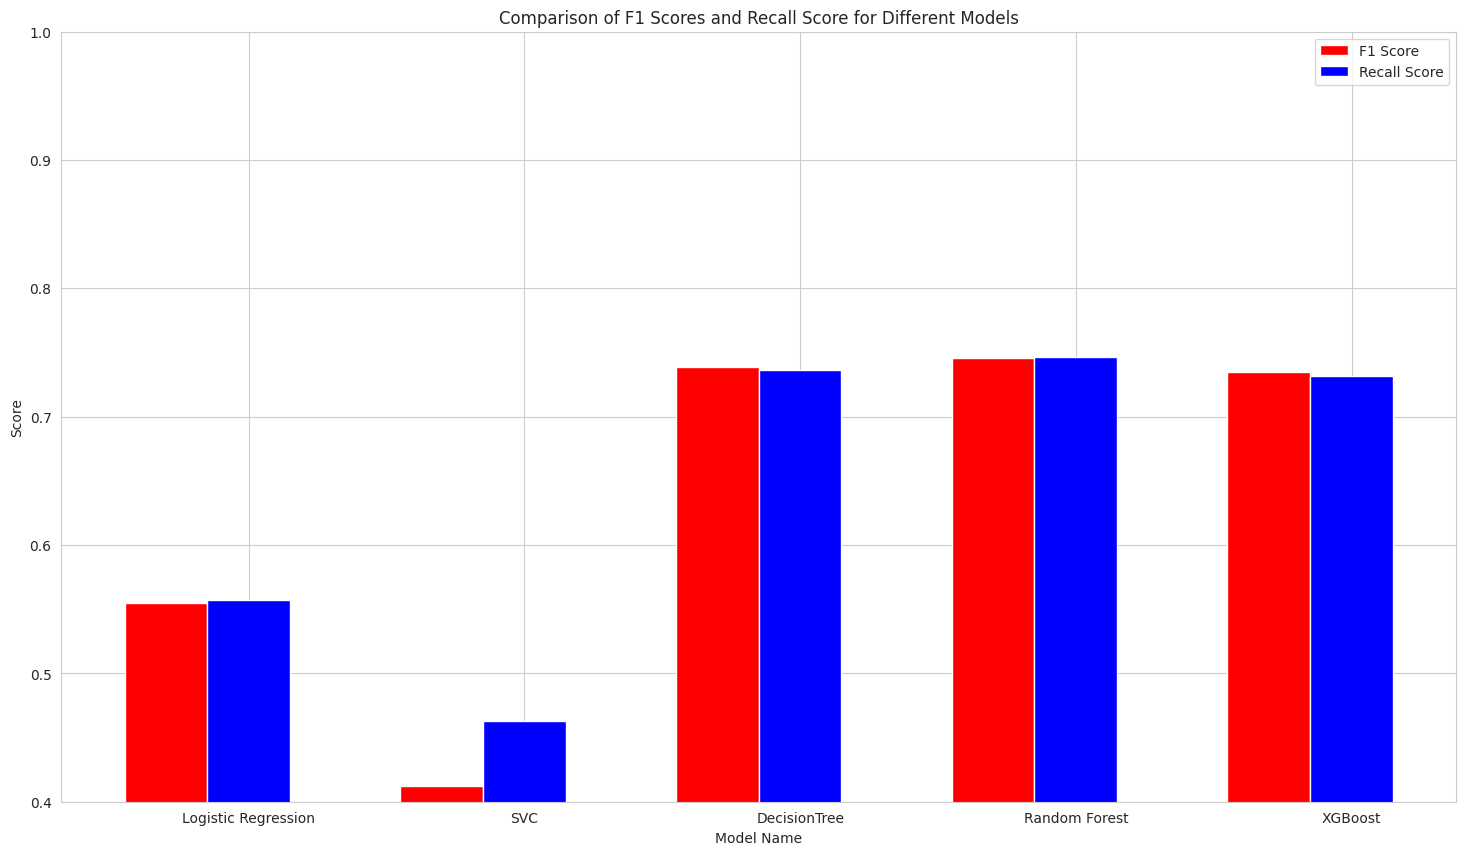

In [ ]:
#Model Comparisons for Columns Selected by Chi Square
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTable))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTable, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTable, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTable))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

1. Chi Square Model Performance

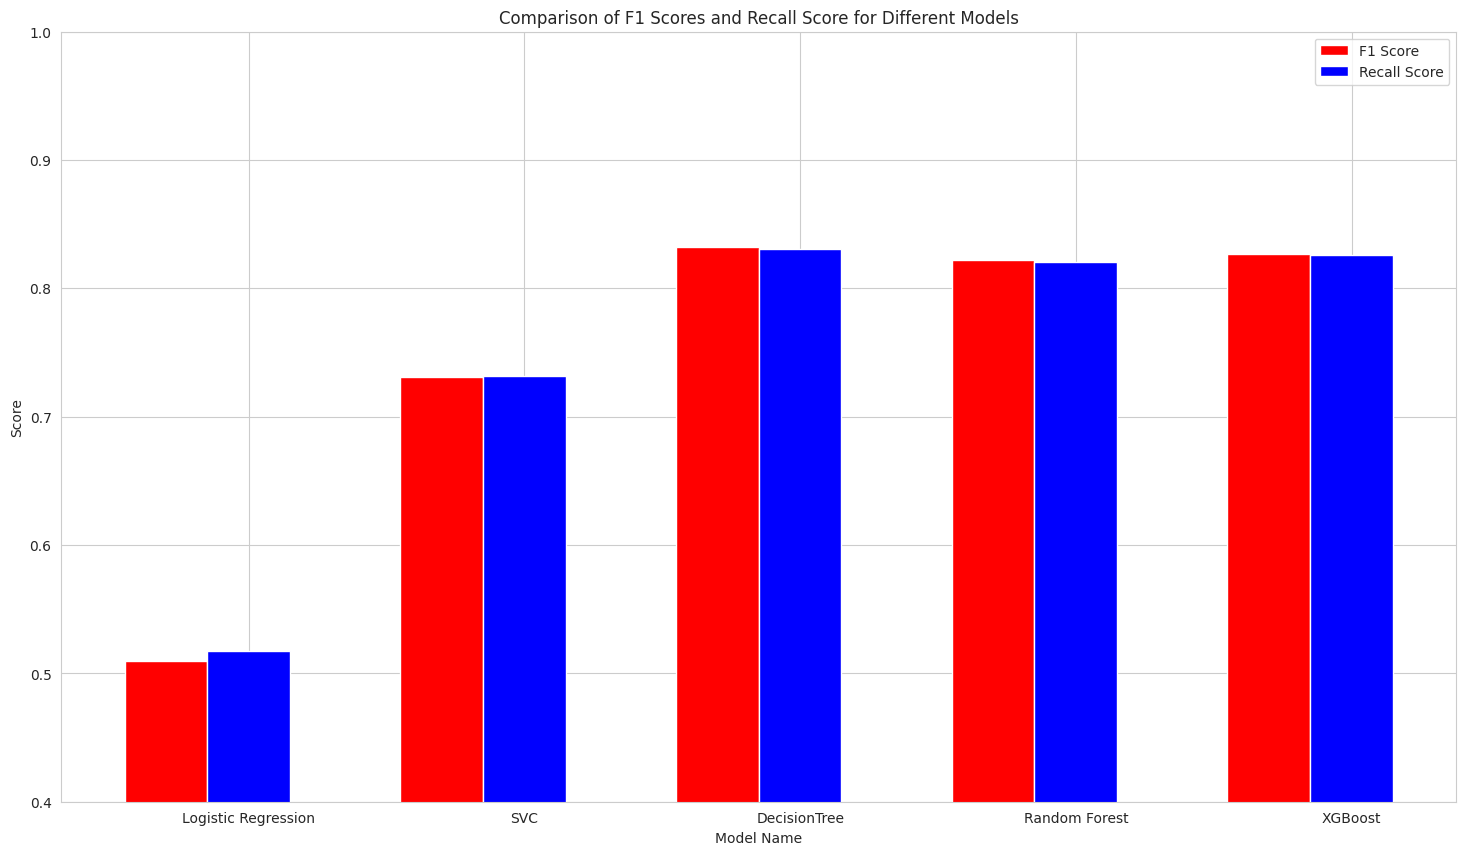

In [ ]:
#Model Comparisons for Columns Selected by Chi Square
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableChi))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableChi, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableChi, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableChi))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

2. Forward Feature Selection Model Performance

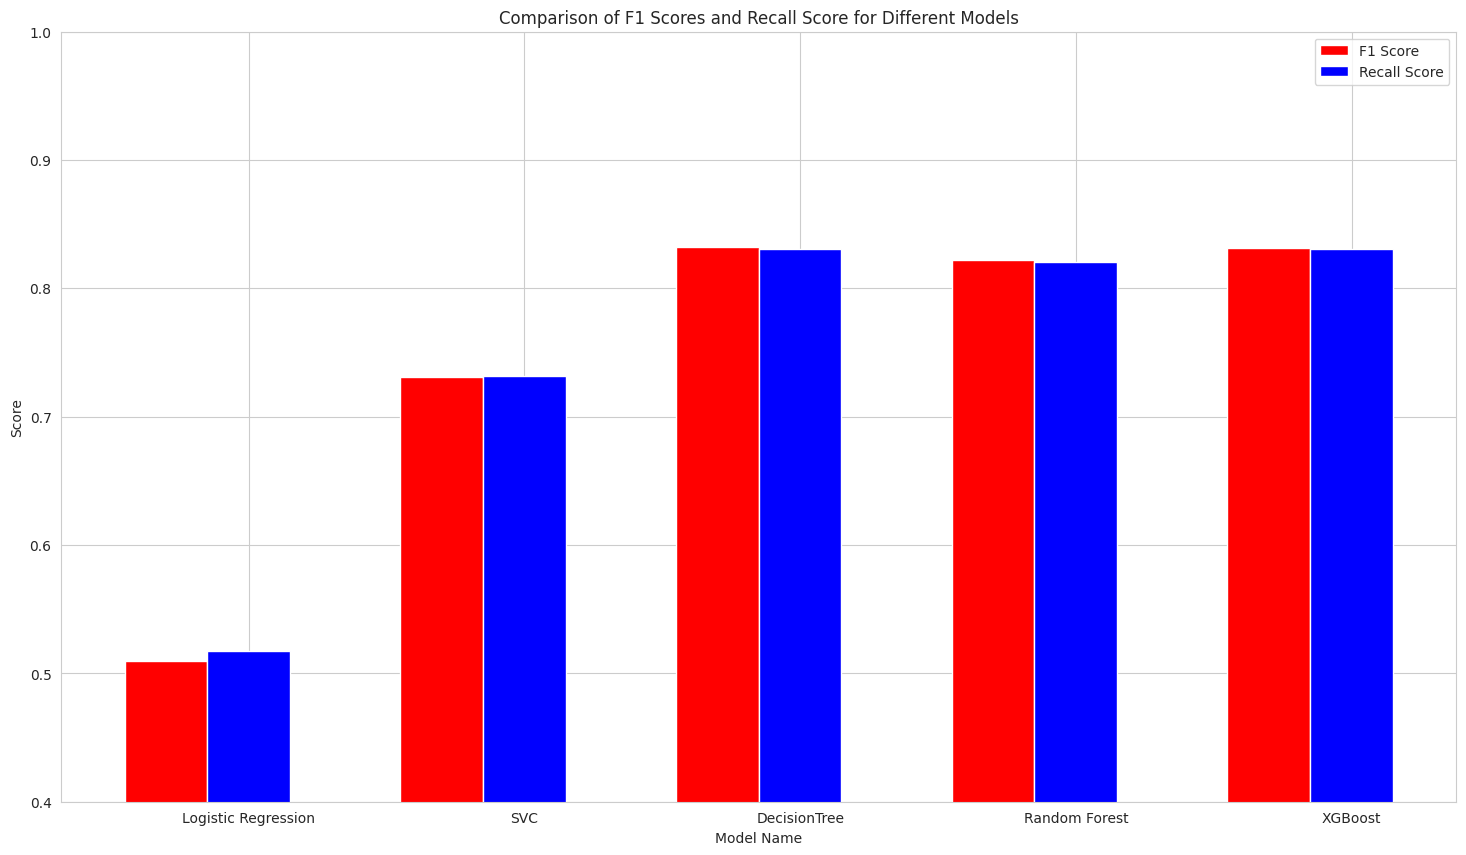

In [ ]:
#Model Comparisons for Columns Selected by Forward Feature Selection
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableFfs))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableFfs, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableFfs, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableFfs))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

3. Backward Feature Elimination Model Performance

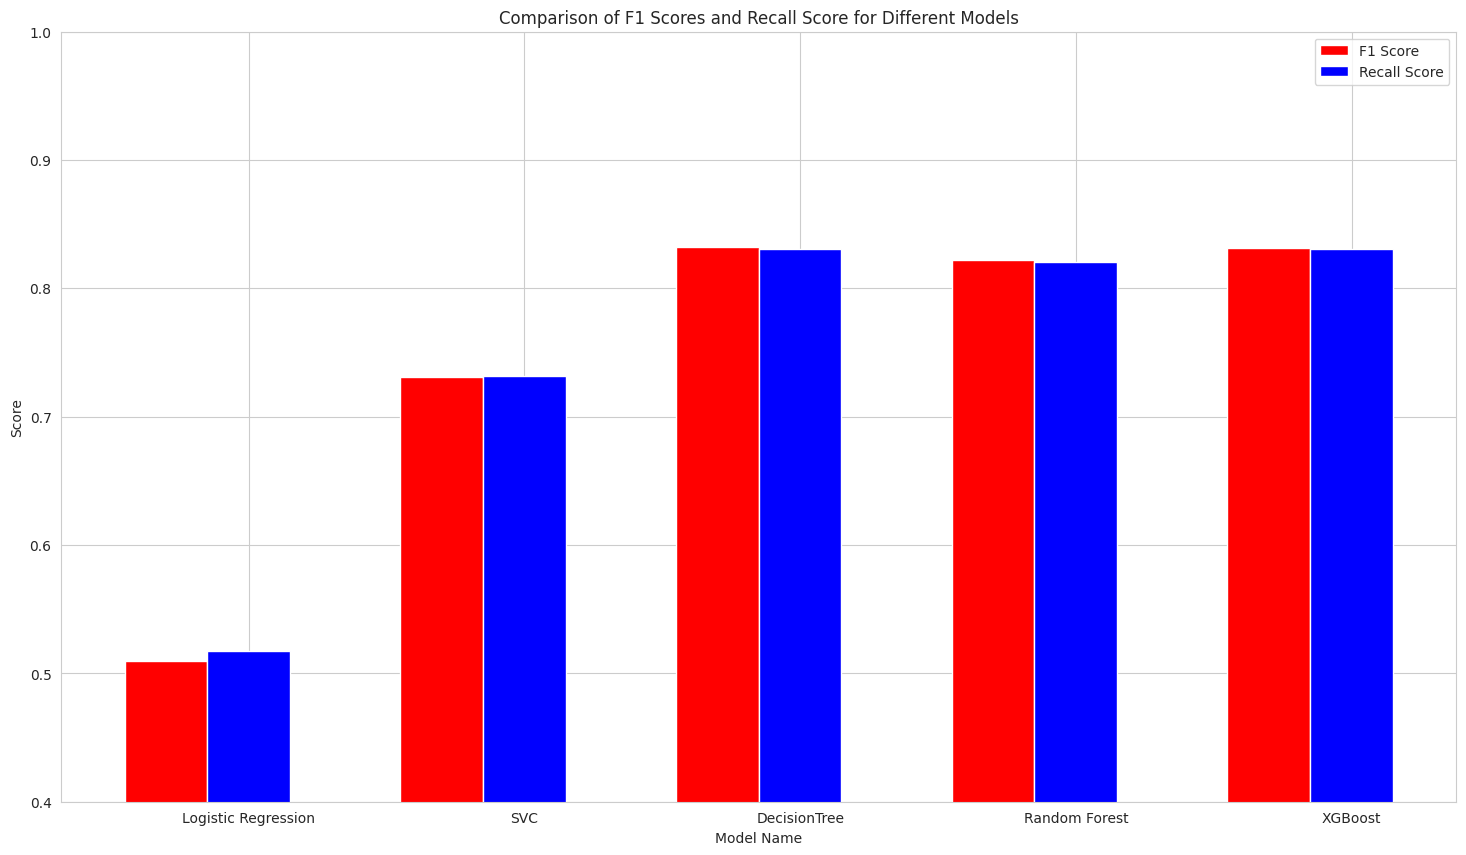

In [ ]:
#Model Comparisons for Columns Selected by Backward Feature Elimination
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableBfe))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableBfe, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableBfe, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableBfe))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

4. Recursive Feature Elimination Model Performance

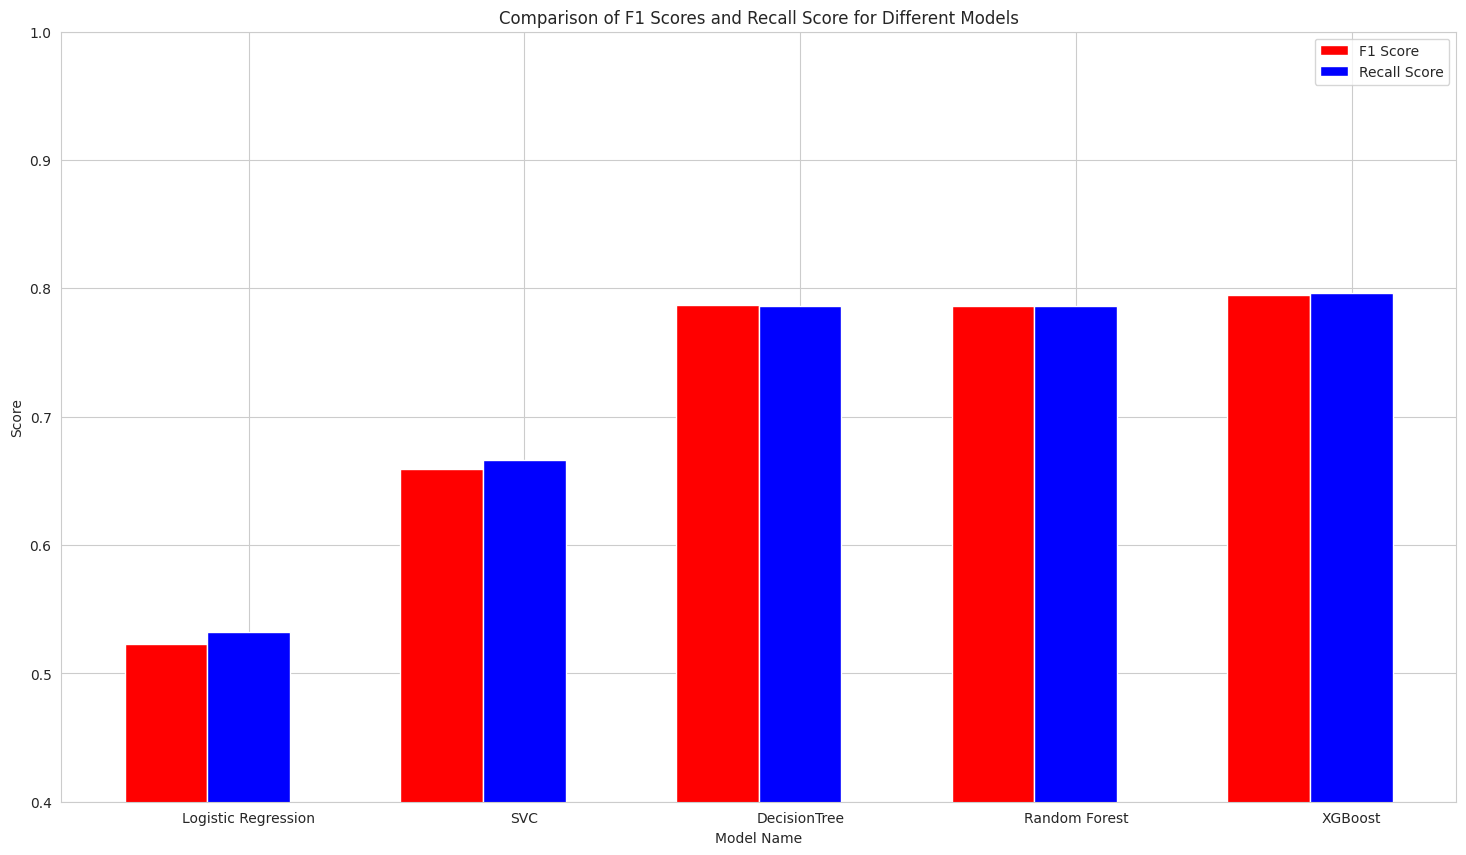

In [ ]:
#Model Comparisons for Columns Selected by Recursive Feature Elimination
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableRFE))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableRFE, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableRFE, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableRFE))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

5. Random Forest Importance Model Performance

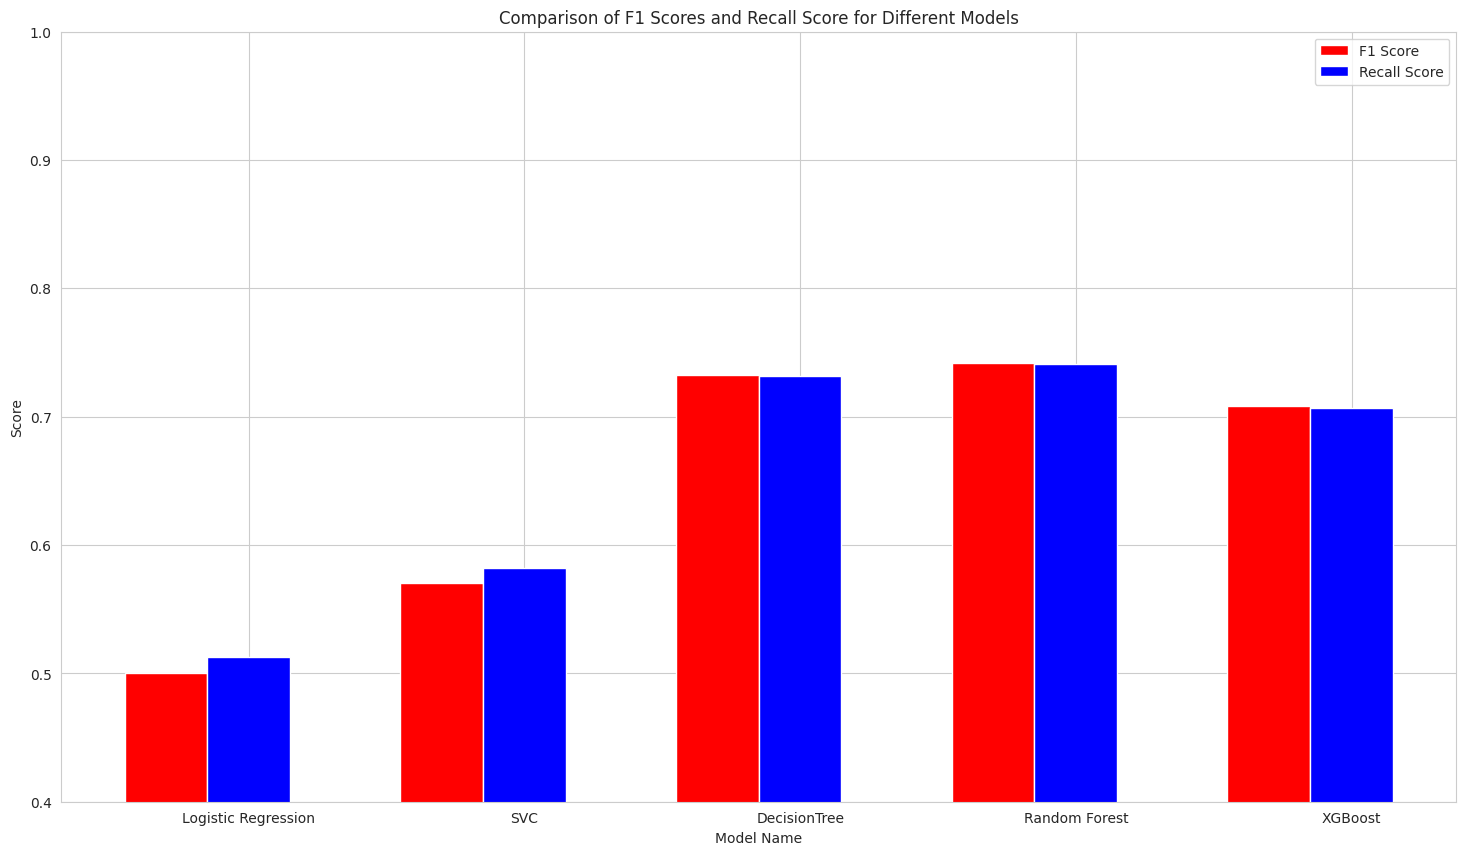

In [ ]:
#Model Comparisons for Columns Selected by Random Forest Importance
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableRfi))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableRfi, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableRfi, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableRfi))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

6. L1 Regularization (LASSO)

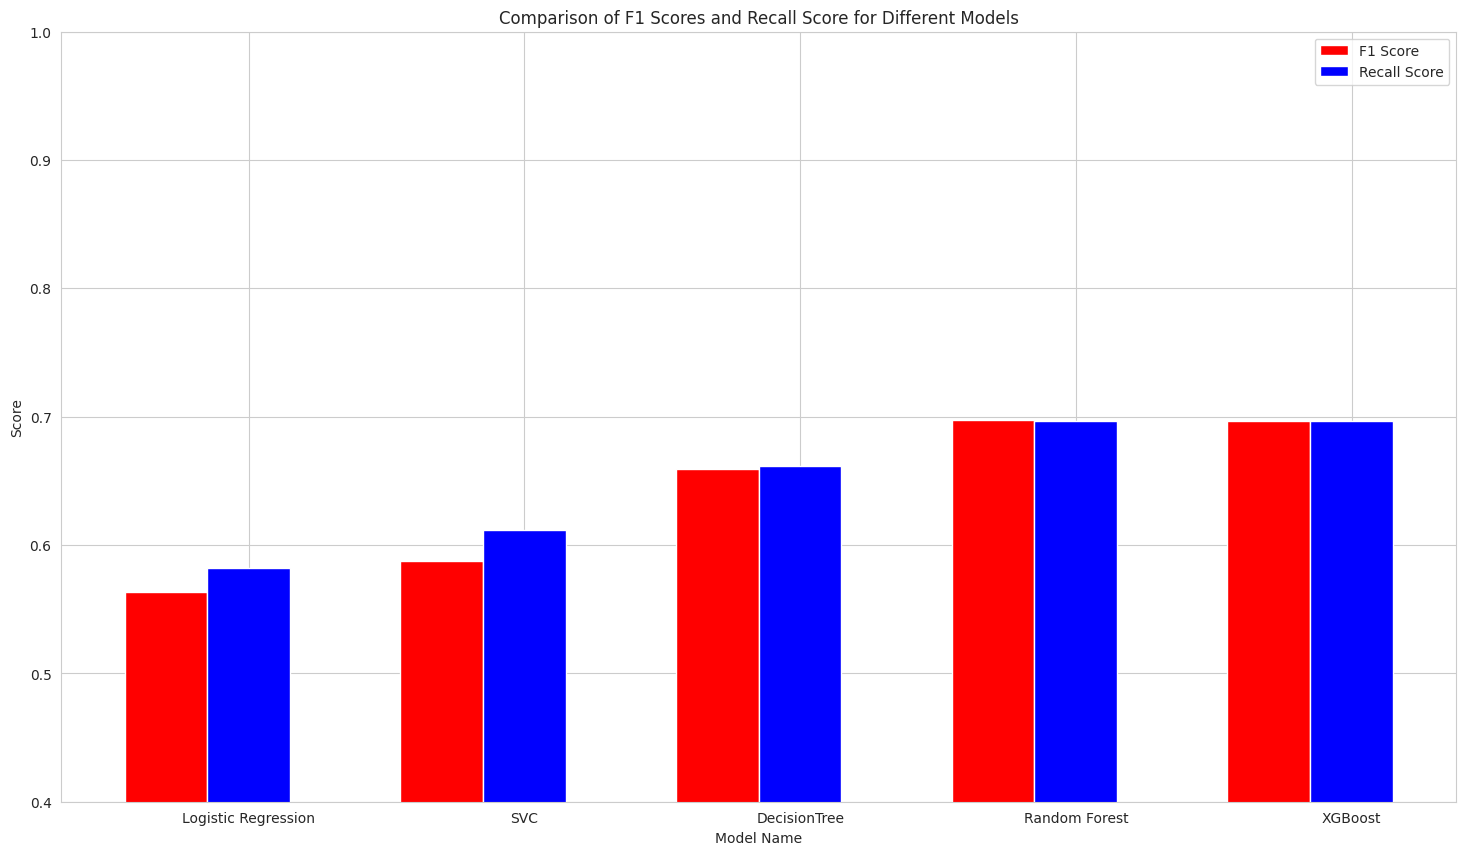

In [ ]:
#Model Comparisons for Columns Selected by Random Forest Importance
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableLASSO))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableLASSO, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableLASSO, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableLASSO))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

7. L2 Regularization (Ridge)

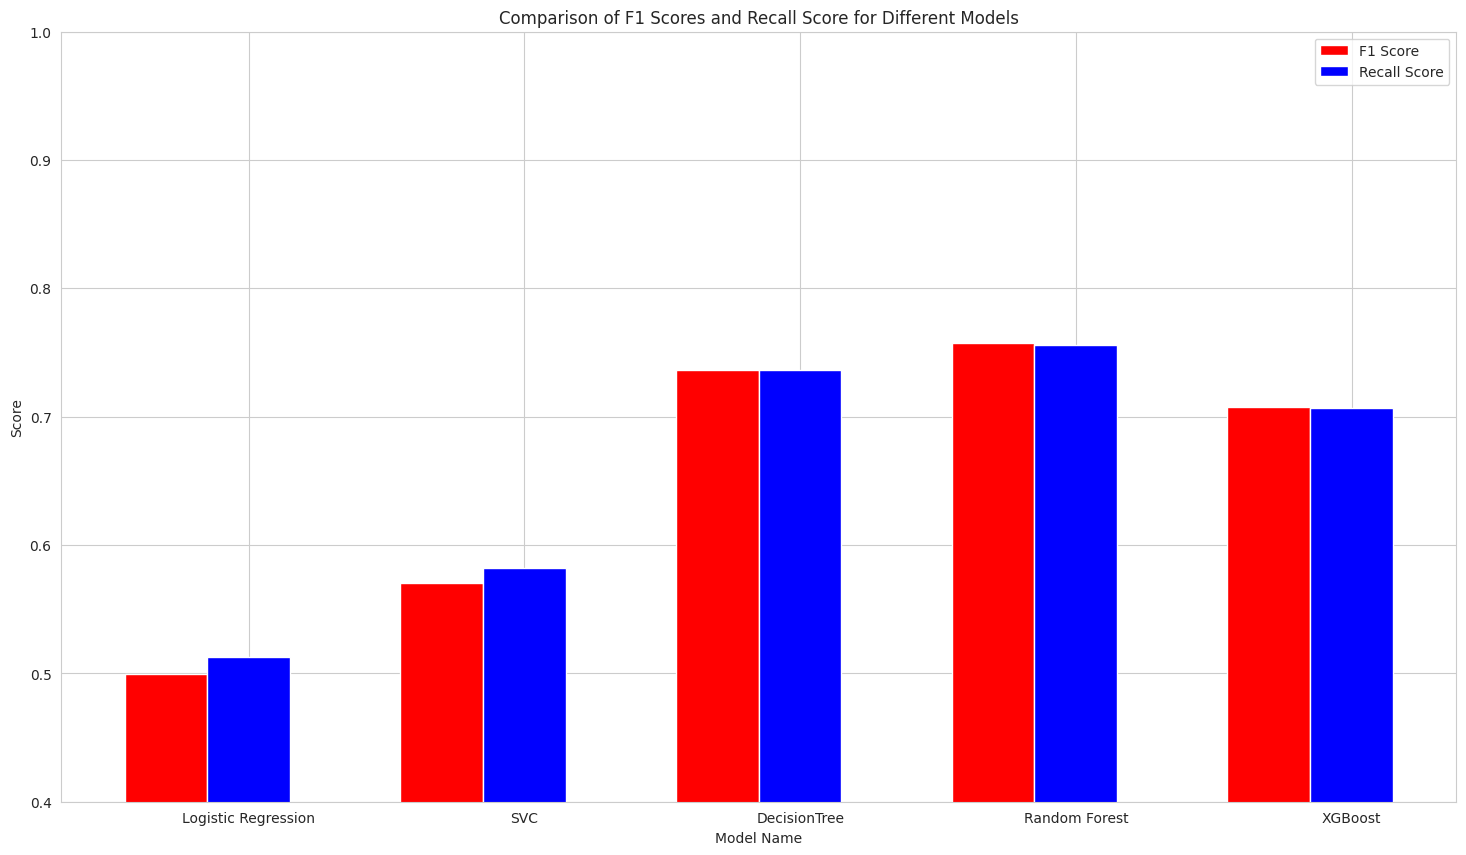

In [ ]:
#Model Comparisons for Columns Selected by Random Forest Importance
models = ['Logistic Regression', 'SVC', 'DecisionTree', 'Random Forest', 'XGBoost']
barWidth = 0.3
# Set the positions of the bars on the x-axis
r1 = np.arange(len(f1ScoresTableRidge))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(figsize=(18, 10))
# Create the bar chart
ax.bar(r1, f1ScoresTableRidge, color='red', width=barWidth, label='F1 Score')
ax.bar(r2, recallScoresTableRidge, color='blue', width=barWidth, label='Recall Score')
# Add x-axis labels and title
ax.set_xticks([r + barWidth for r in range(len(f1ScoresTableRidge))])
ax.set_xticklabels(models)
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 Scores and Recall Score for Different Models') # Add a legend
plt.ylim(0.4, 1.0)
plt.legend()
# Show the plot
plt.show()

Plotting the accuracies for the feature techniques used

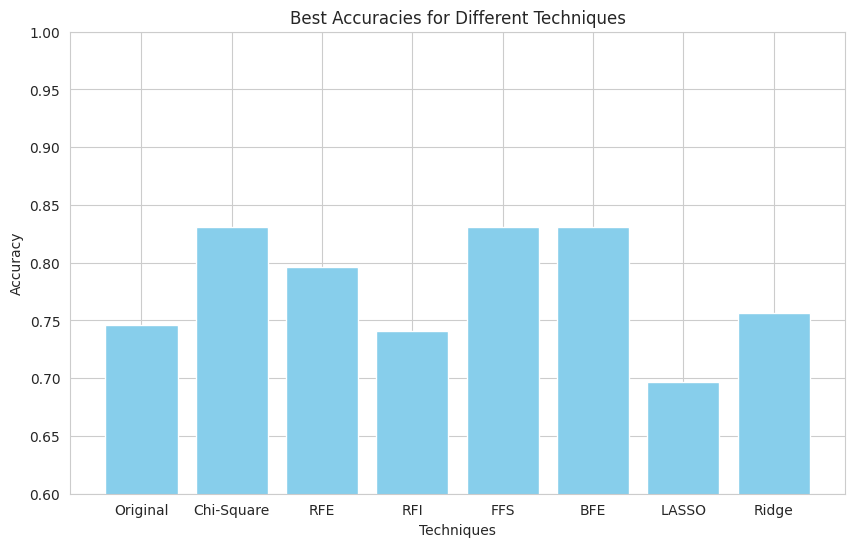

In [ ]:
# Plotting
techniques = ['Original','Chi-Square', 'RFE', 'RFI', 'FFS', 'BFE', 'LASSO','Ridge']
plt.figure(figsize=(10, 6))
plt.bar(techniques, best_accuracies, color='skyblue')
plt.title('Best Accuracies for Different Techniques')
plt.xlabel('Techniques')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.show()

### **Hyperparameter Tuning**

In [ ]:
# Processed Dataset
x_ffs = maternal_health_df_cleaned[FFS_features]
y_ffs = maternal_health_df_cleaned.RiskLevel
x_train_ffs, x_test_ffs, y_train_ffs, y_test_ffs = train_test_split(x_ffs, y_ffs, test_size=0.2, random_state=1)

In [ ]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(x_train_ffs, y_train_ffs)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_ffs)

print("Train accuracy:", best_model.score(x_train_ffs, y_train_ffs))
print("Test accuracy:", best_model.score(x_test_ffs, y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("accuracy: ", accuracy)
print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test_ffs, y_pred)* 100 ,'%')
print(classification_report(y_test_ffs, y_pred))

Fitting 5 folds for each of 896 candidates, totalling 4480 fits
Best Parameters:  {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.8087500000000001
Train accuracy: 0.92875
Test accuracy: 0.8159203980099502
F1 Score:  0.8167952345754838
Precision Score:  0.8181940973863713
Recall Score:  0.8159203980099502
accuracy:  0.8159203980099502
[2 1 2 1 0 2 2 0 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 0 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 1 1 2 0 1 0 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 1 1 0 0 0 2 1 0 2 0 1 1 1 0 0 1 2 0 0 2 0 1 1
 2 1 2 0 1 1 0 1 1 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0]
CM: [[63 14  0]
 [12 54  4]
 [ 3  4 47]]
Accuracy: 81.59203980099502 %
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        77
           1       0.7

In [ ]:
rf_class_report = classification_report(y_test_ffs, y_pred, output_dict=True)
rf_acc = accuracy_score(y_test_ffs, y_pred)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(x_train_ffs, y_train_ffs)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_ffs)

print("Train accuracy:", best_model.score(x_train_ffs, y_train_ffs))
print("Test accuracy:", best_model.score(x_test_ffs, y_test_ffs))

# Calculating accuracy and other values
f1_score_value = f1_score(y_test_ffs, y_pred, average='weighted')
precision = precision_score(y_test_ffs, y_pred, average='weighted')
recall = recall_score(y_test_ffs, y_pred, average='weighted')
accuracy = accuracy_score(y_test_ffs, y_pred)
print("F1 Score: ", f1_score_value)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("Accuracy: ", accuracy)

print(y_pred)
cm = confusion_matrix(y_test_ffs, y_pred)
print(f'Confusion Matrix:', cm)
print(f'Accuracy:', accuracy_score(y_test_ffs, y_pred) * 100, '%')
print(classification_report(y_test_ffs, y_pred))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters:  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Best Score:  0.83375
Train accuracy: 0.93125
Test accuracy: 0.8208955223880597
F1 Score:  0.821958583152613
Precision Score:  0.8241441441441442
Recall Score:  0.8208955223880597
Accuracy:  0.8208955223880597
[2 1 2 1 0 2 2 1 2 0 2 1 1 1 0 2 2 1 2 2 0 2 0 1 2 2 2 0 2 2 0 1 1 1 1 1 1
 1 1 1 0 1 1 2 1 1 2 0 1 0 0 0 1 0 0 2 0 2 0 1 2 2 1 1 2 1 1 0 2 2 1 0 0 1
 0 1 2 0 1 2 0 1 1 1 2 1 2 0 2 1 0 2 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 0 2 0 0 2 0 2 1 2 1 0 0 1 0 0 0 1 1 0 2 0 1 1 1 0 0 1 2 0 1 2 0 1 1
 2 1 2 0 1 1 0 1 0 2 1 2 0 0 2 0 0 0 1 2 1 0 0 1 2 0 2 1 0 2 1 2 1 0 1 2 0
 0 0 1 0 0 1 1 0 0 0 1 2 0 0 0 0]
Confusion Matrix: [[63 14  0]
 [10 56  4]
 [ 4  4 46]]
Accuracy: 82.08955223880598 %
              precision    recall  f1-score   support

           0       0.82      0.82      0.82  

In [ ]:
xgb_class_report = classification_report(y_test_ffs, y_pred, output_dict=True)
xgb_acc = accuracy_score(y_test_ffs, y_pred)

In [ ]:
# Extracting metrics
metrics_1 = {
    'recall': best_class_report['weighted avg']['recall'],
    'f1-score': best_class_report['weighted avg']['f1-score'],
    'accuracy': best_acc
}

metrics_2 = {
    'recall': rf_class_report['weighted avg']['recall'],
    'f1-score': rf_class_report['weighted avg']['f1-score'],
    'accuracy': rf_acc
}

metrics_3 = {
    'recall': xgb_class_report['weighted avg']['recall'],
    'f1-score': xgb_class_report['weighted avg']['f1-score'],
    'accuracy': xgb_acc
}

print("Metrics for Inital model", metrics_1)
print("Metrics for Hypertuned Decision Tree:", metrics_2)
print("Metrics for Hypertuned XGB", metrics_3)

Metrics for Inital model {'recall': 0.8308457711442786, 'f1-score': 0.831697952812966, 'accuracy': 0.8308457711442786}
Metrics for Hypertuned Decision Tree: {'recall': 0.8159203980099502, 'f1-score': 0.8167952345754838, 'accuracy': 0.8159203980099502}
Metrics for Hypertuned XGB {'recall': 0.8208955223880597, 'f1-score': 0.821958583152613, 'accuracy': 0.8208955223880597}
